# **Project Title : Cardiovascular Risk Prediction Classification -**


### **The data set is form an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predicts wheather the patients has a 10-year risk of future coronary heart disease (CHD) . The data set provide the patients information. It  include s over 4000 records and 15 attributes.Each attribute is a potential risk factor . There are both demographic ,behavioral, and medical risk factor.**







  Project Agenda:

*   Data description

*   Defining the problem statement
*   Data Preprocessing


*   EDA


*   Model 1 : Logistic Regression

*   Model 2: K-nearest Neighbors

*   Comparison Between Models
*   Model Explainability Using Eli5


*  Conclusion










## **Data Description**

### **Demographic**



*   **Sex: male Or female("M" or"F")**
*    **Age: Age of patient**



### **Behavioral:**





*   **is_smoking: whether or not the patient is a current smoker ("YES" or "NO")**
*    **Cigs Per Day: the number of cigarettes that the person smoked on average in one day.**





## **Medical History:**




*   **BP Meds: whether or not the patient was on blood pressure medication**.
*   **Prevalent Stroke: whether or not the patient had previously had a stroke**.
*  **Prevalent Hyp: whether or not the patient was hypertensive**.
*   **Diabetes: whether or not the patient had diabetes** .



## **Medical( current):**



*   **Tot Chol: total cholesterol level**

*   **Sys BP: systolic blood pressuret**
*   **Dia BP: diastolic blood pressure**


*   **BMI: Body Mass Index**



*  **Heart Rate: heart rate**
*  **Glucose: Glucose level**




## **Predict variable (desired target):**



*   **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -**






In [70]:
# Importing the pre-requisite libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_validate,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

import random
#import eli5
import pickle

import warnings
warnings.filterwarnings('ignore')  # Code to not show me any warnings that might arise

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Importing the dataset.
cardio_df=pd.read_csv("/content/drive/MyDrive/data_cardiovascular_risk.csv")

In [73]:
# Inspecting the dataset.

cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [74]:
cardio_df.tail()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [75]:
# Checking out the datatype of all the columns.

cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [76]:

# Understanding the basic stats.

cardio_df.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


# **Defining The Problem Statement.**
Understanding the difference between numeric[continuous variables and discrete variables] & categorical variables.

**Continous variables** - These are those variables whose values are obtained by measuring. They can assume any value between an interval.

**Discrete variables** - These are those variables whose values are obtained by counting. They can assume distinct set of values.

**Categorical variables** - These are those variables whose values are of string datatype or binary in nature and they assume distinct set of values.

Why Choose Classification to model the data?

Classification is used to model the data because we want to predict the **dependent variable(y)** which is categorical in nature.

Segregating the variables into dependent & independent* variables[categorical or continous/discrite.].*

Dependent Variable(Y): TenYearCHD is categorical in nature with 2 classes 0 & 1.


*   Sex = It is categorical in nature with 2 classes Male & Female.

*   Age = It is continuous in nature.

*   Education = It is categorical in nature with 4 classes 1, 2, 3, & 4.

*   is_smoking = It is categorical in nature with 2 classes 1 & 0.

*   Cigs Per Day: It is continuous in nature as one can consume any number of cigs.
*   BP Meds: It is categorical in nature with 2 classes 1 & 0.


*   Prevalent Stroke: It is categorical in nature with 2 classes 1 & 0.


*   Prevalent Stroke: It is categorical in nature with 2 classes 1 & 0.


* Prevalent Hyp: It is categorical in nature with 2 classes 1 & 0.


*   Diabetes: It is categorical in nature with 2 classes 1 & 0.


*   Tot Chol: It is continuous in nature.
*   Sys BP: It is continuous in nature.

*   Dia BP: It is continuous in nature.
*   BMI: It is continuous in nature.

*   Heart Rate: It is continuous in nature.
*   Glucose: It is continuous in nature.




















# **Data Preprocessing**

In this section, I will be treating the null values, outliers, and dublicated rows.

In [77]:
# Checking for dublicate rows.

duplicate_check = cardio_df[cardio_df.duplicated()]
print(f'The number of dublicate rows are {len(duplicate_check)}')

The number of dublicate rows are 0


In [78]:
# Checking the missing values and their percentage of missing values.


print('Missing Data Count')
print(cardio_df.isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(cardio_df.isnull().sum().sort_values(ascending = False)/len(cardio_df)*100,2))

Missing Data Count
glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64
------------------------
Missing Data Percentage
glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
id                 0.00
diaBP              0.00
sysBP              0.00
prevalentHyp       0.00
diabetes           0.00
age                0.00
prevalentStroke    0.00
is_smoking         0.00
sex                0.00
TenYearCHD         0.00
dtype: float64


Dealing with null values of continuous columns[glucose, totChol, cigsperday, BMI, heartrate] = I will replace the null values for these columns with there respective median because these columns have outliers. As we all know that mean is sensitive to outliers.

Dealing with null values of categorical columns[education, BPMeds] = I will replace the null values with mode.

In [79]:

# Inputing the missing values of continuous columns.

conti_missing_values_columns = ['glucose','totChol','cigsPerDay','BMI','heartRate']

for col in conti_missing_values_columns:
  cardio_df[col].fillna(cardio_df[col].median(), inplace = True)

In [80]:

# Imputing the missing values of categorical columns.

cardio_df = cardio_df.fillna(cardio_df['education'].value_counts().index[0])
cardio_df = cardio_df.fillna(cardio_df['BPMeds'].value_counts().index[0])

In [81]:
# Checking out if we have imputed all the null values.

cardio_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [82]:
# Dropping the id column from the dataset.

cardio_df.drop('id', axis = 1, inplace = True)


In [83]:
# Creating a list of numeric variables.

num_var = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose']


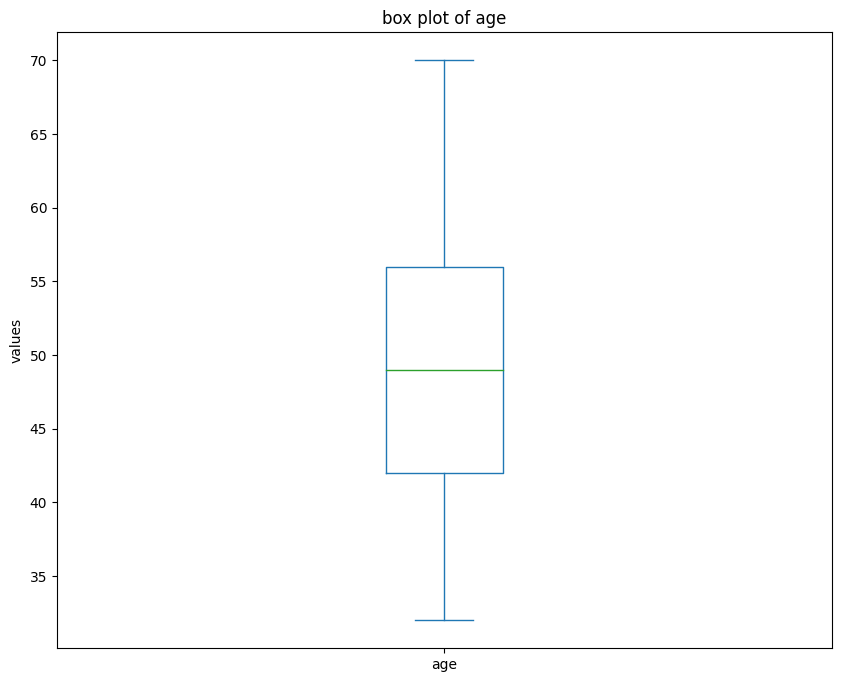

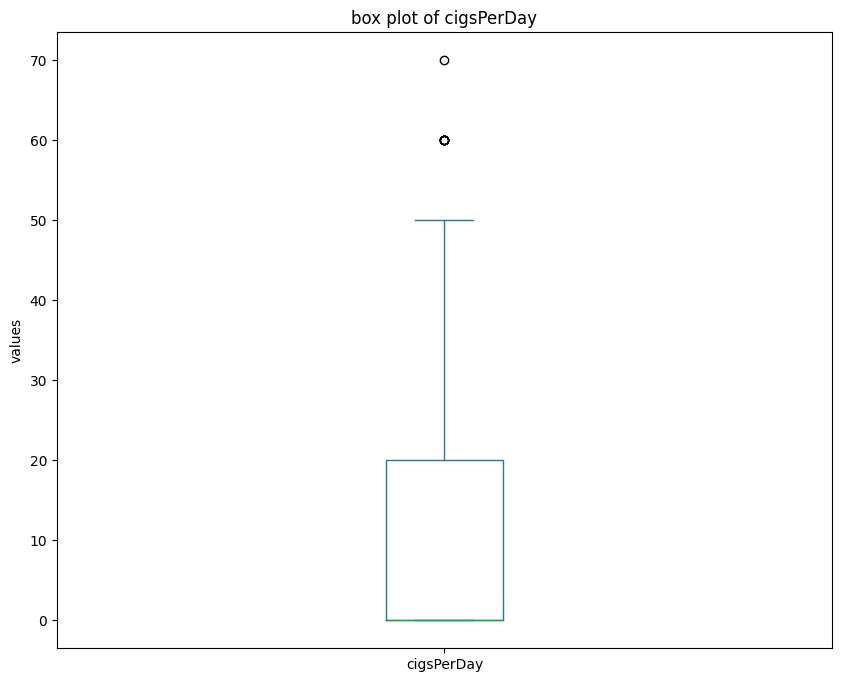

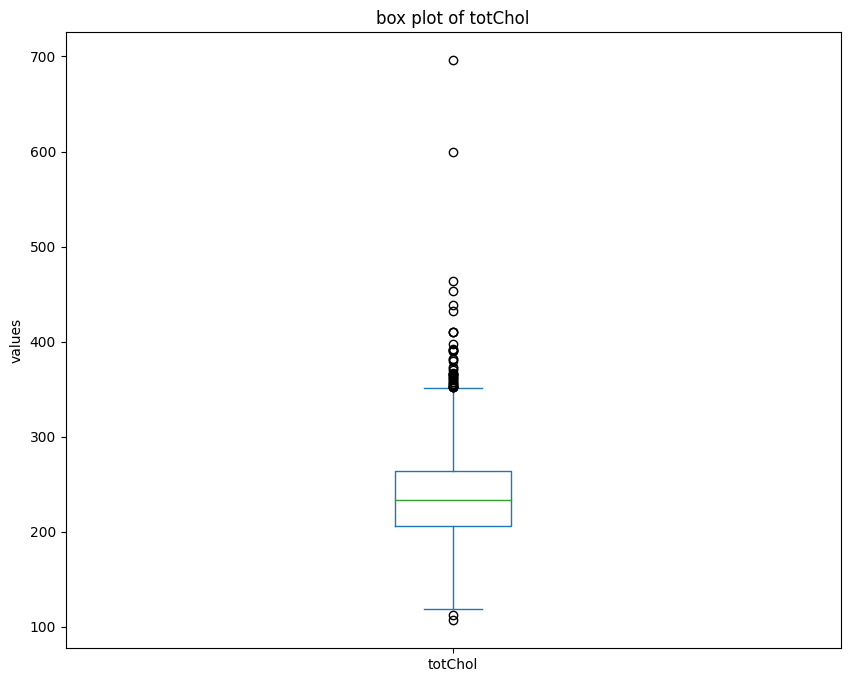

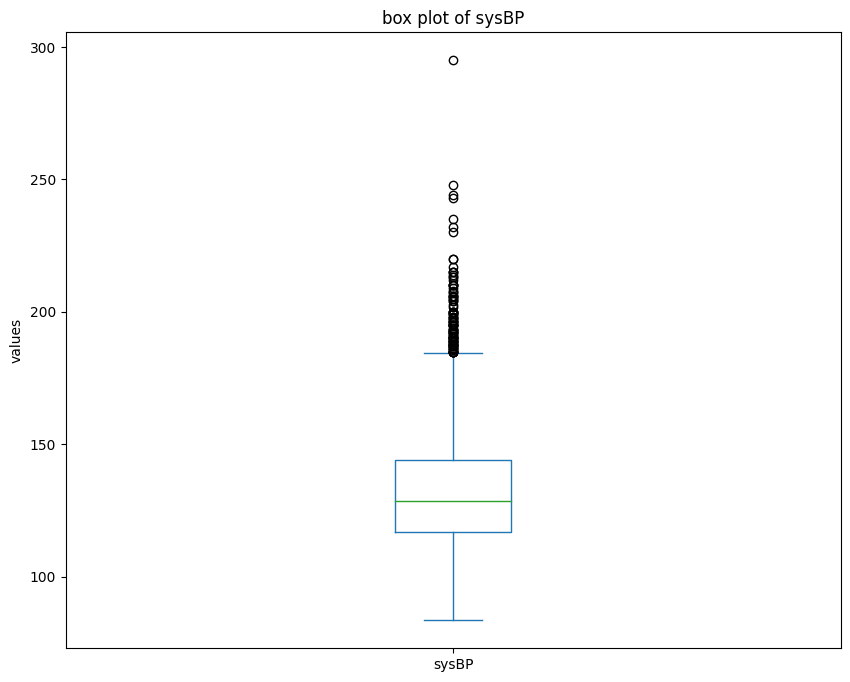

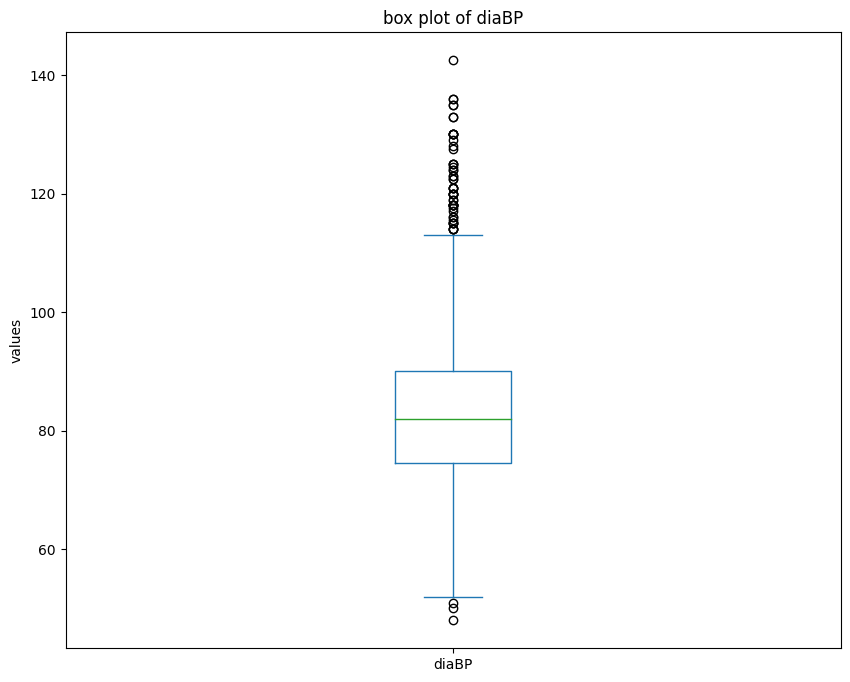

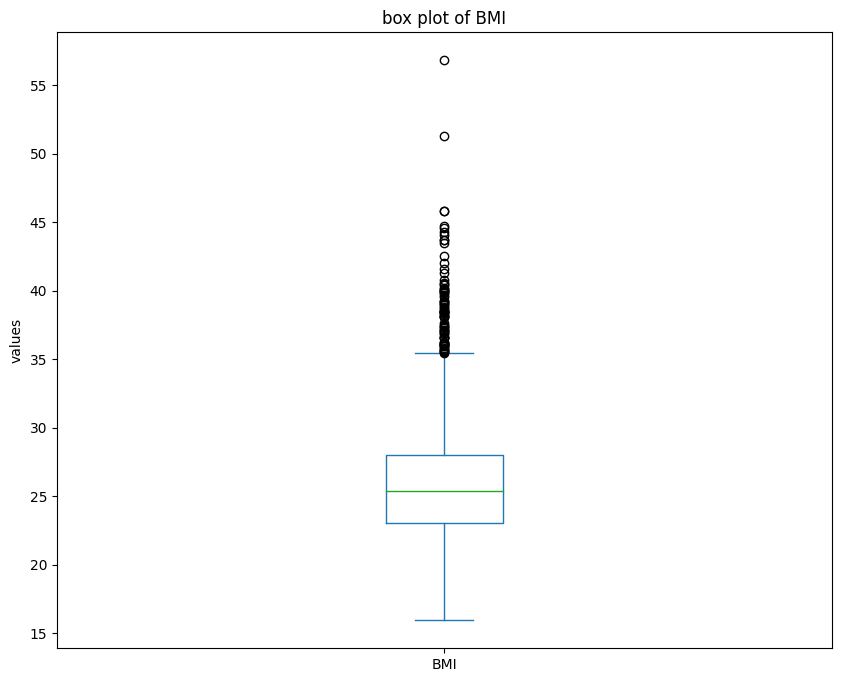

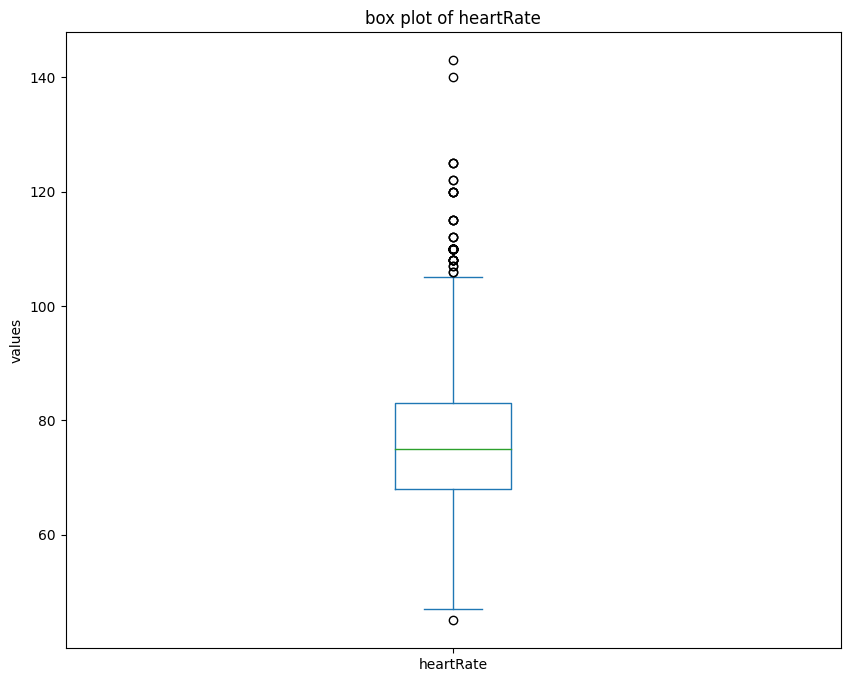

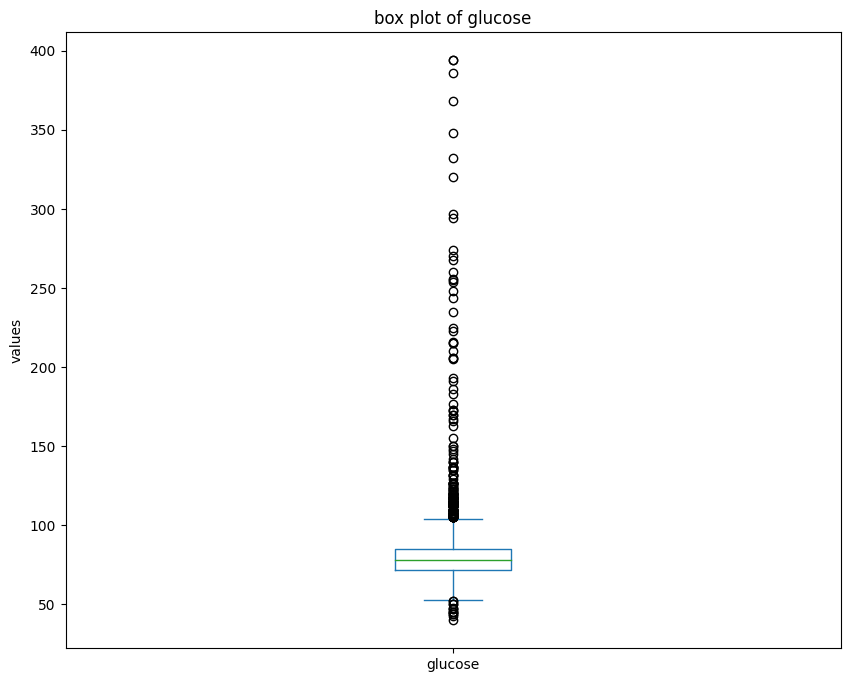

In [84]:
# Visualizing the outliers using boxplots.

for col in num_var:
  plt.figure(figsize = (10,8))
  plt.gca()
  cardio_df[col].plot(kind = 'box')
  plt.ylabel('values')
  plt.title(f'box plot of {col}')



From the box plots, we can see that all columns except age have outliers. We will be removing these outliers now.

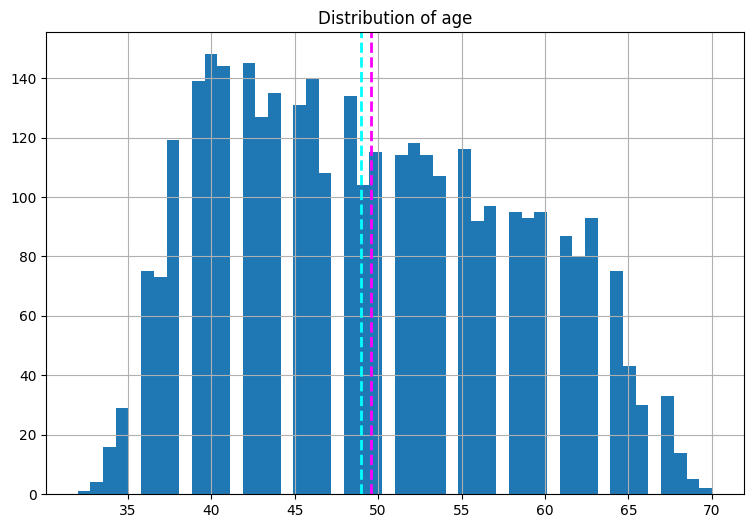

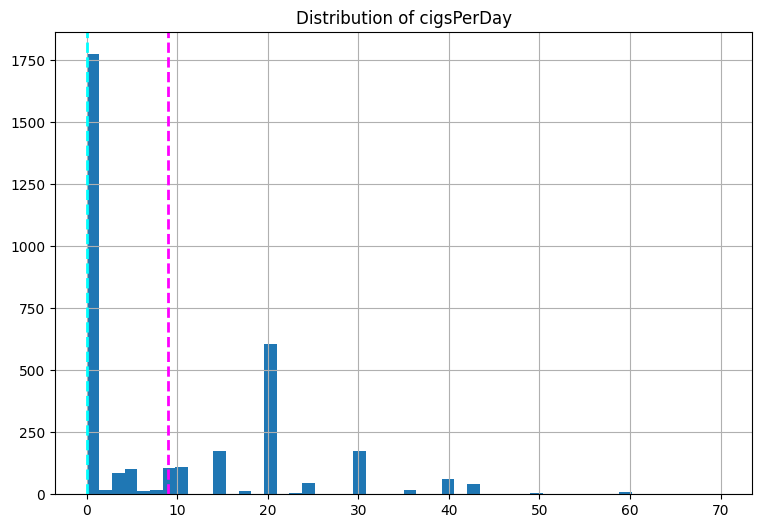

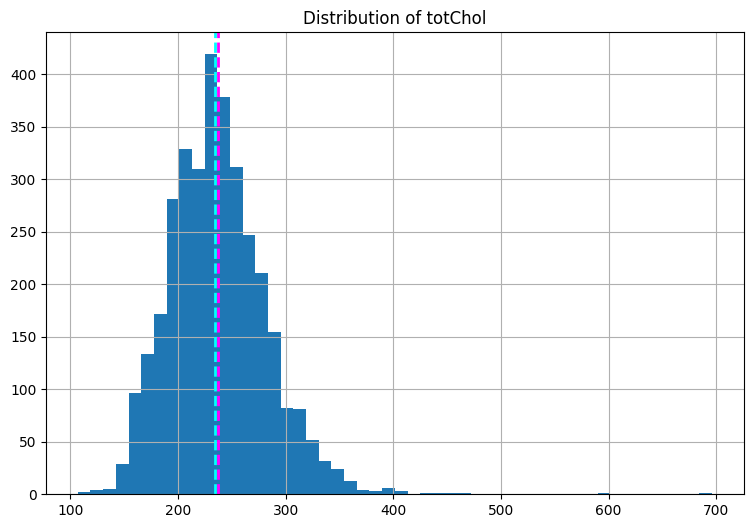

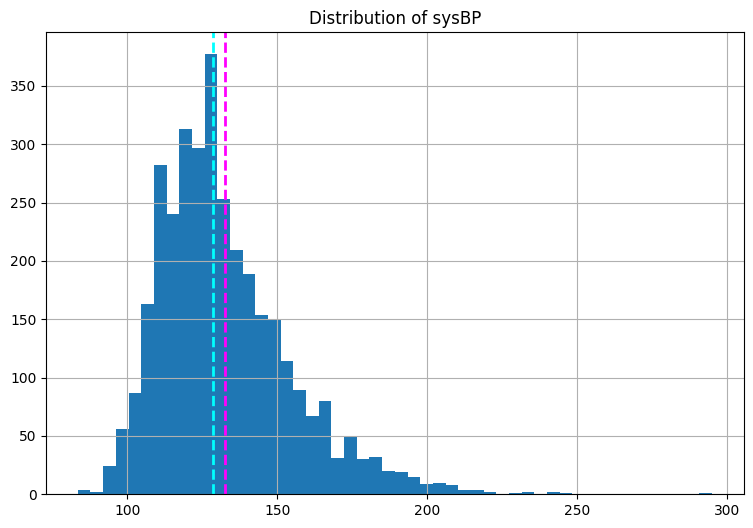

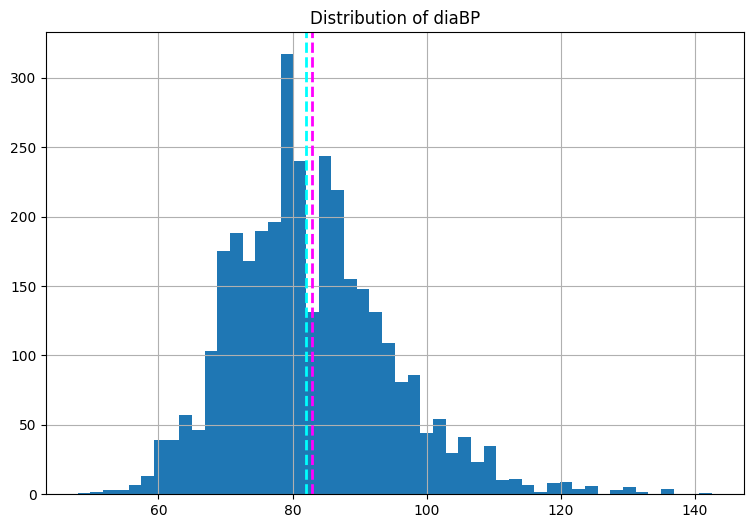

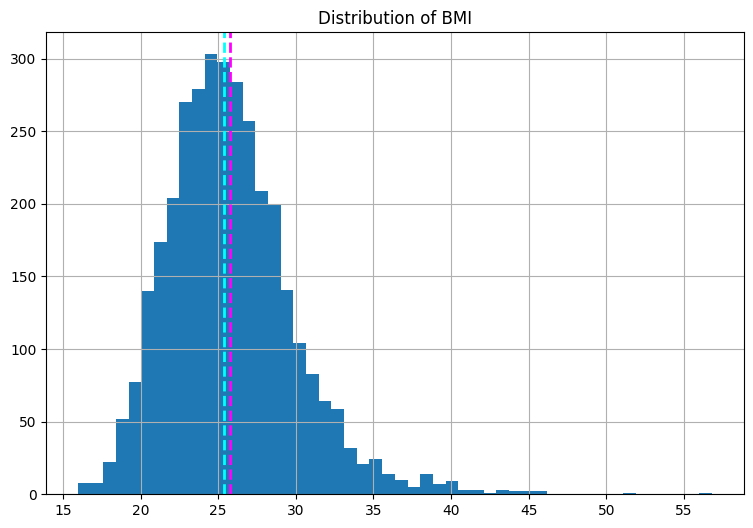

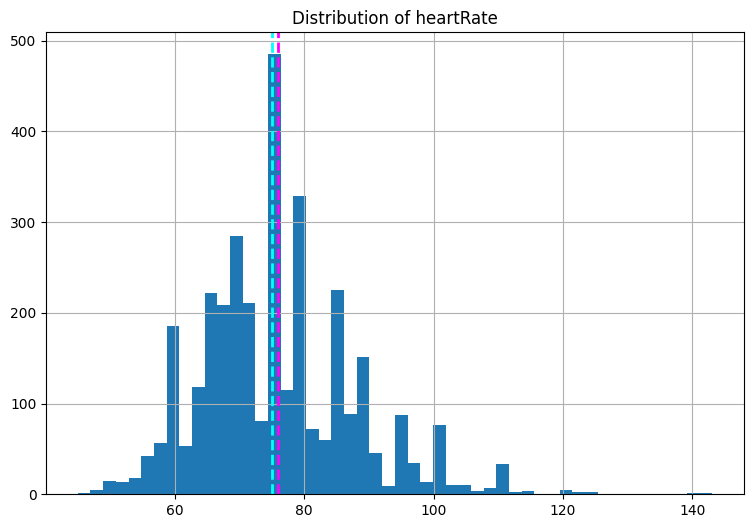

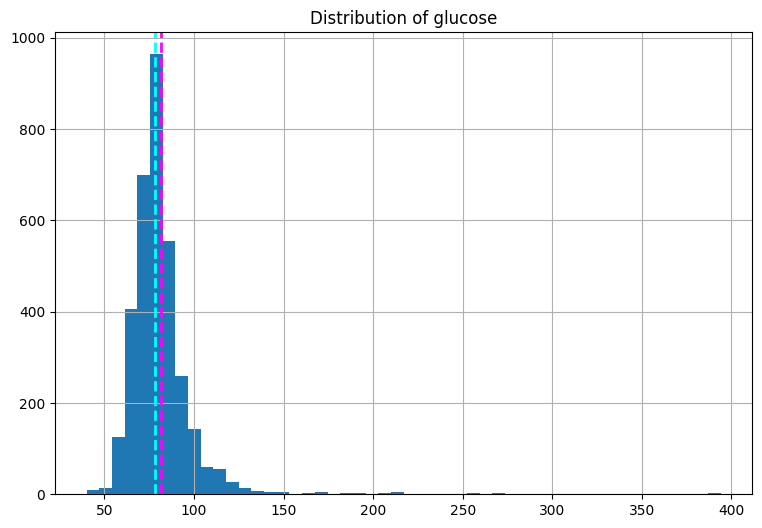

In [85]:
# Visualizing the distribution of the columns that have outliers.

for col in num_var:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = cardio_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title('Distribution of '+ col)
plt.show()

In [86]:
# Creating a copy of this dataset.

no_outliers_df = cardio_df.copy()

I have created a copy of this dataset because other models like KNN are robust to outliers so I don't need to remove outliers from the dataset like I have done below. While implementing KNN. I will use the cardio_df dataset.

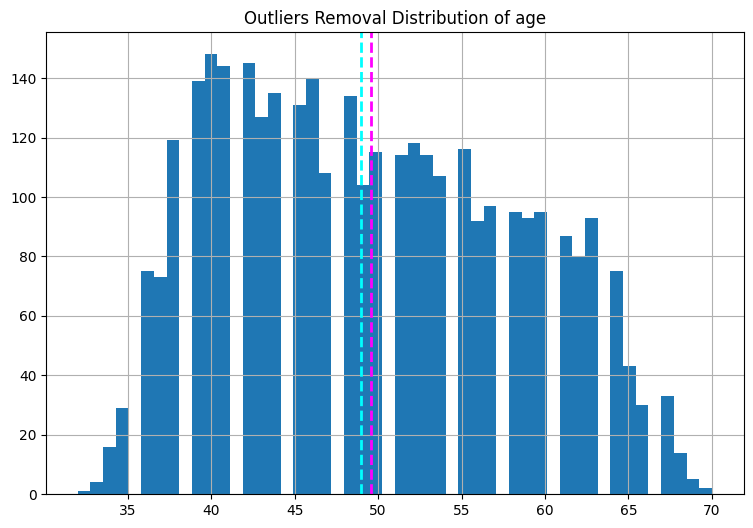

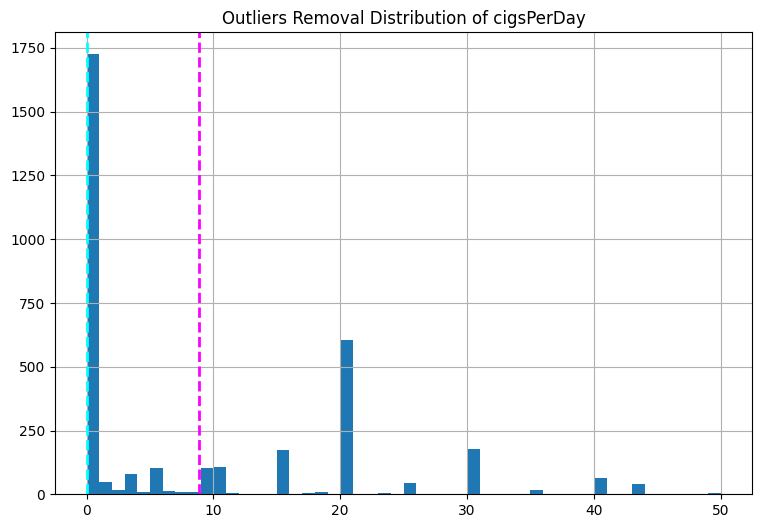

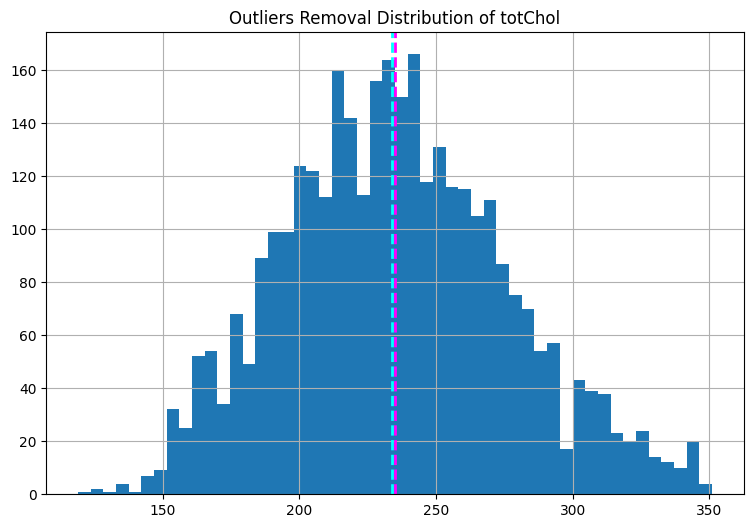

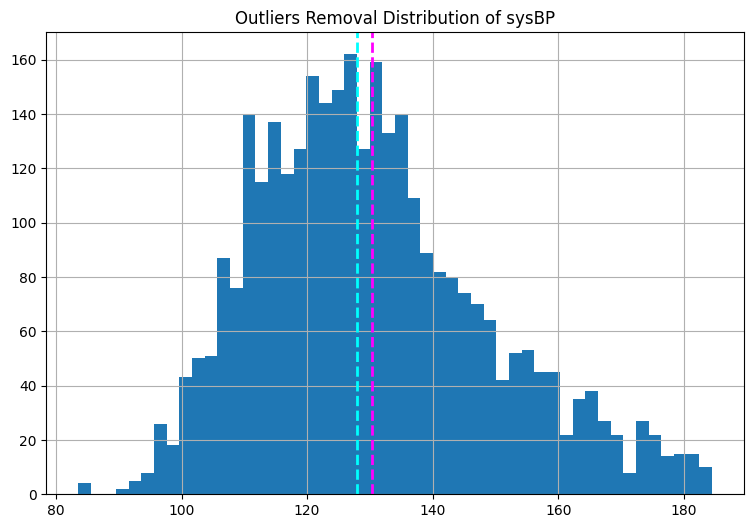

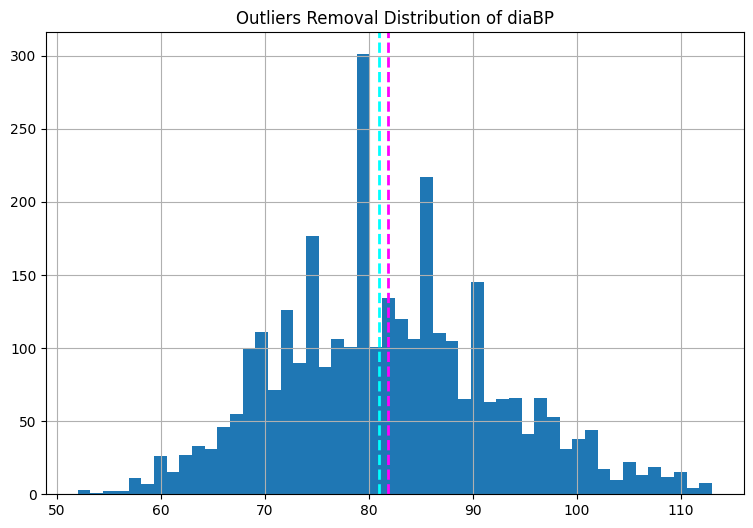

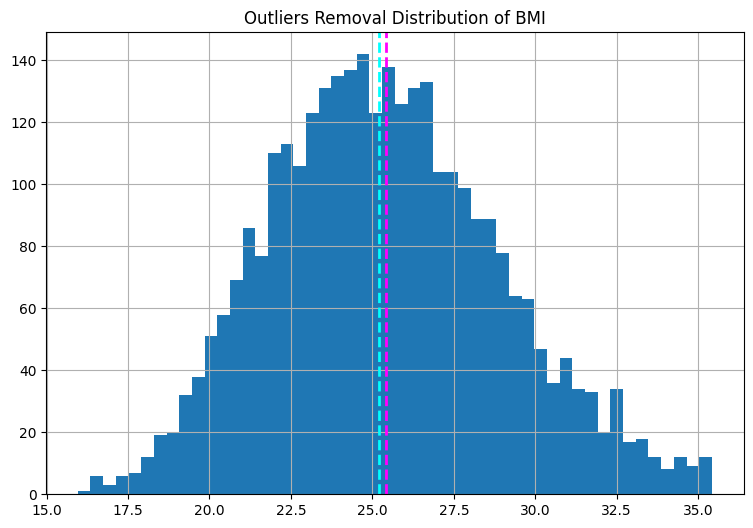

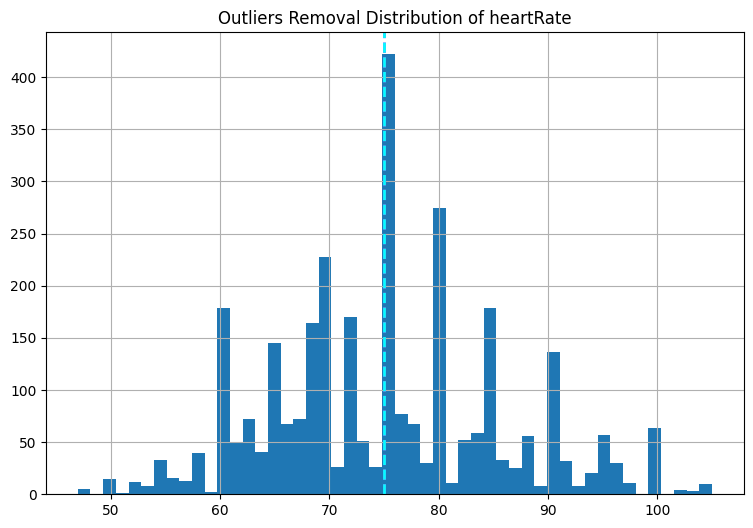

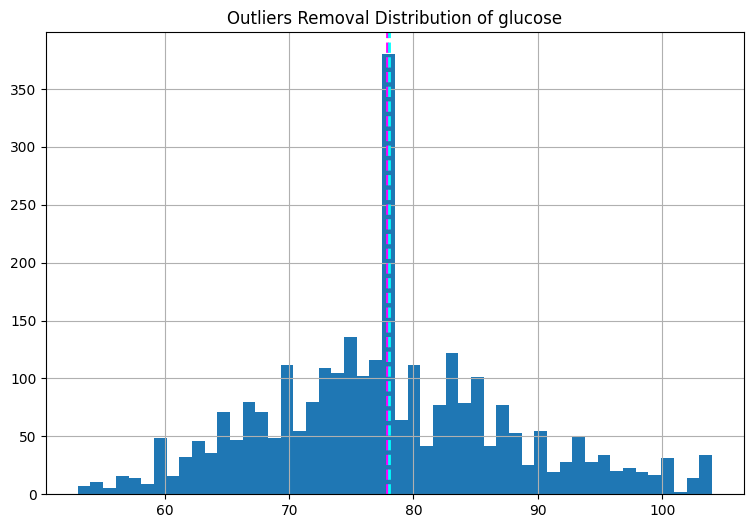

In [87]:
# Removing the outliers from these columns.

for col in num_var:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()

  Q1 = np.percentile(cardio_df[col],25)
  Q3 = np.percentile(cardio_df[col],75)
  IQR = Q3 - Q1
  Lower_outliers = Q1 - 1.5*IQR
  Upper_outliers = Q3 + 1.5*IQR     # Calculating the lower outliers and upperoutliers

  no_outliers_df = no_outliers_df[(no_outliers_df[col] >= Lower_outliers) & (no_outliers_df[col] <= Upper_outliers)]
  feature = no_outliers_df[col]            # Subsetting the data without any outliers in an iterative way.

  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title('Outliers Removal Distribution of '+ col)
plt.show()


As you can see from the above distributions after removing the outliers they have become approximately normally distributed.

# **EDA**

Under EDA, I will be performing univariante analysis, and bivarinate analysis.

Univariante analysis = Helps us understand the distribution of a particular column. The most common way to understand the distribution is to plot a histogram.

Multivarinate analysis = Helps us understand the relationship between the dependent variable and independent variables.

## **Uni-variate Analysis**

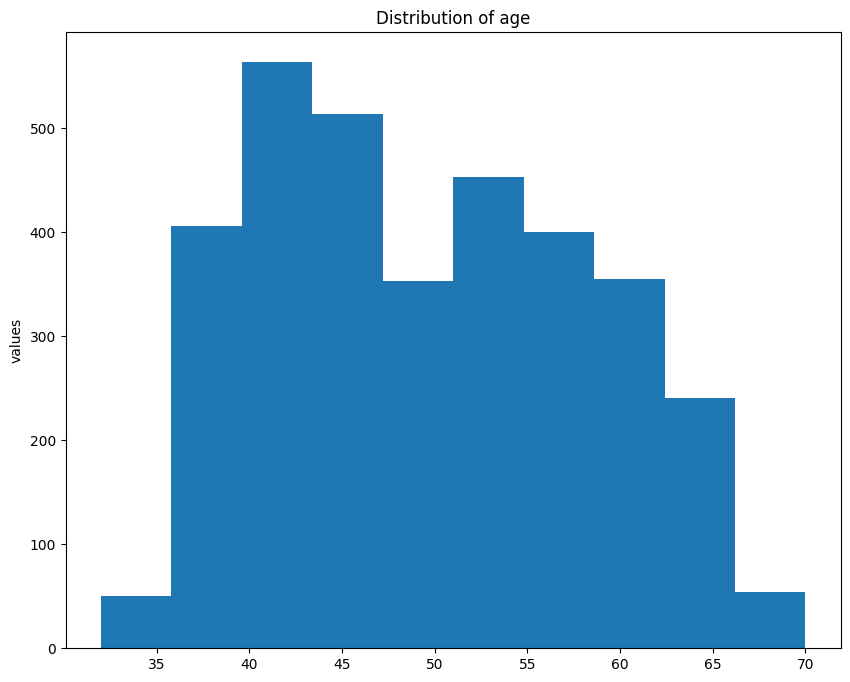

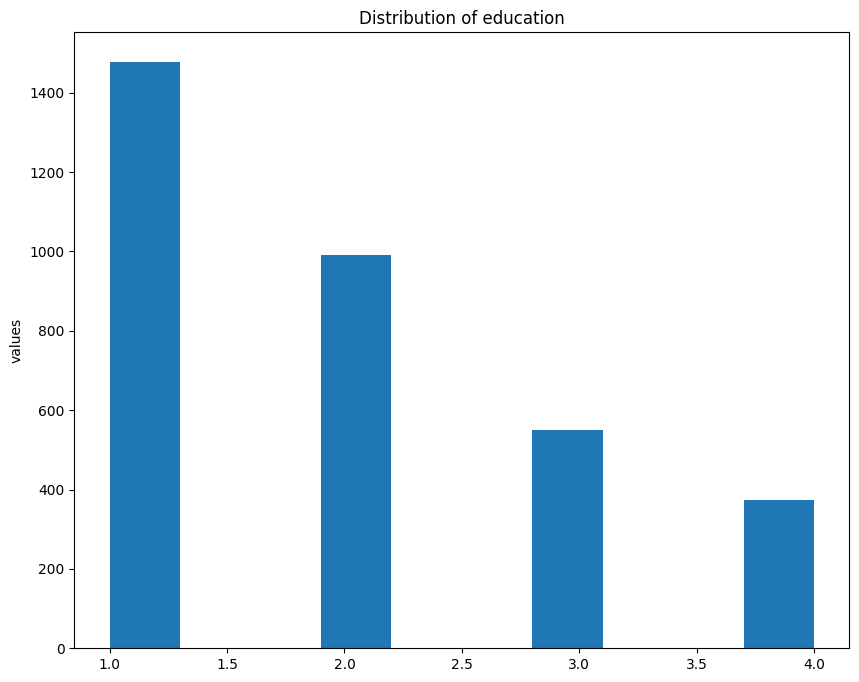

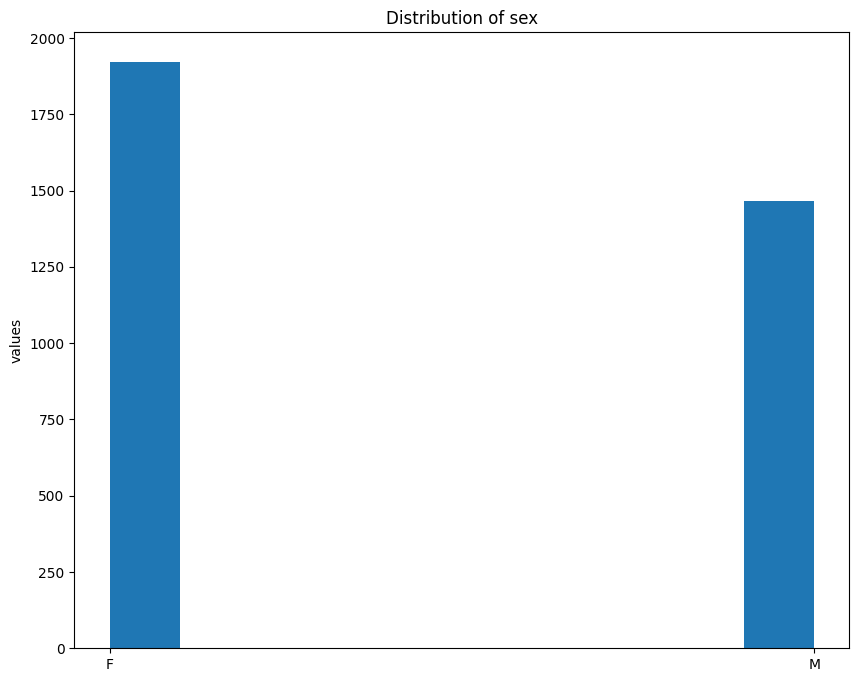

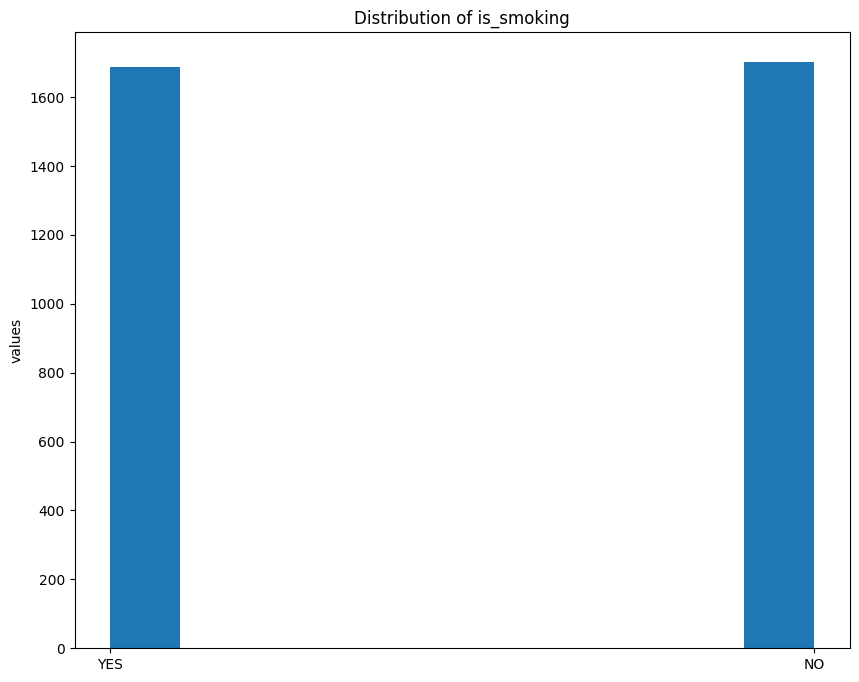

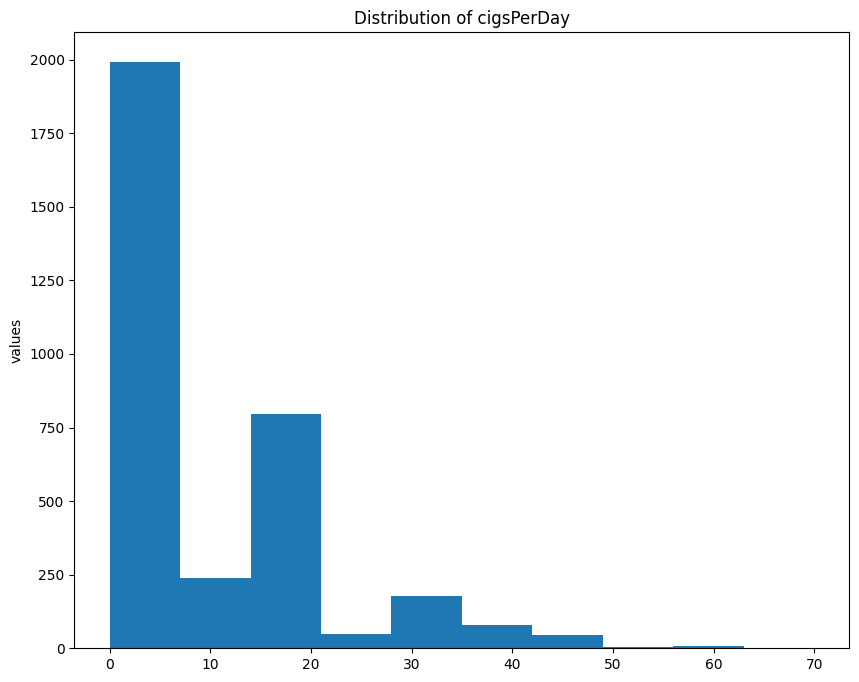

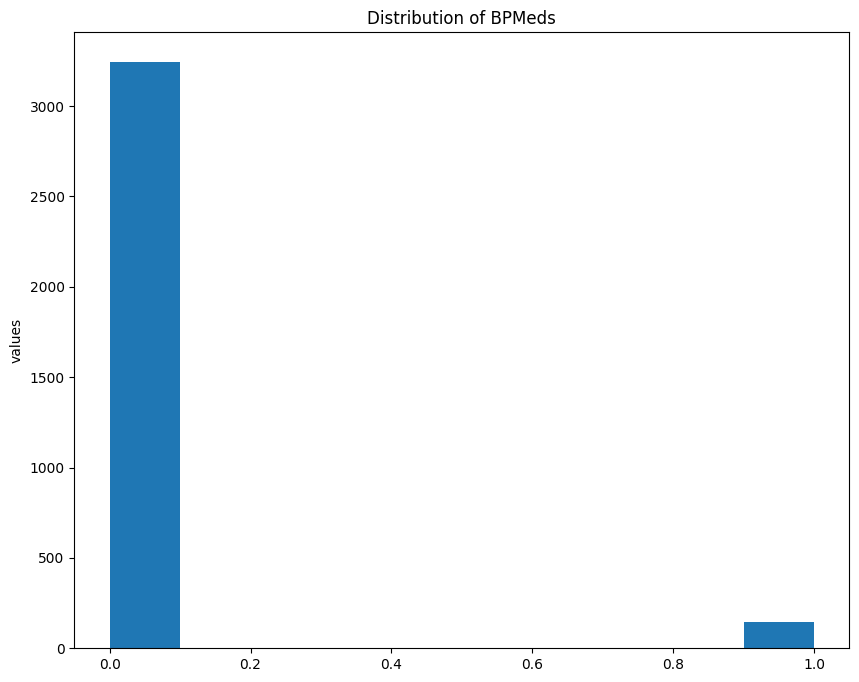

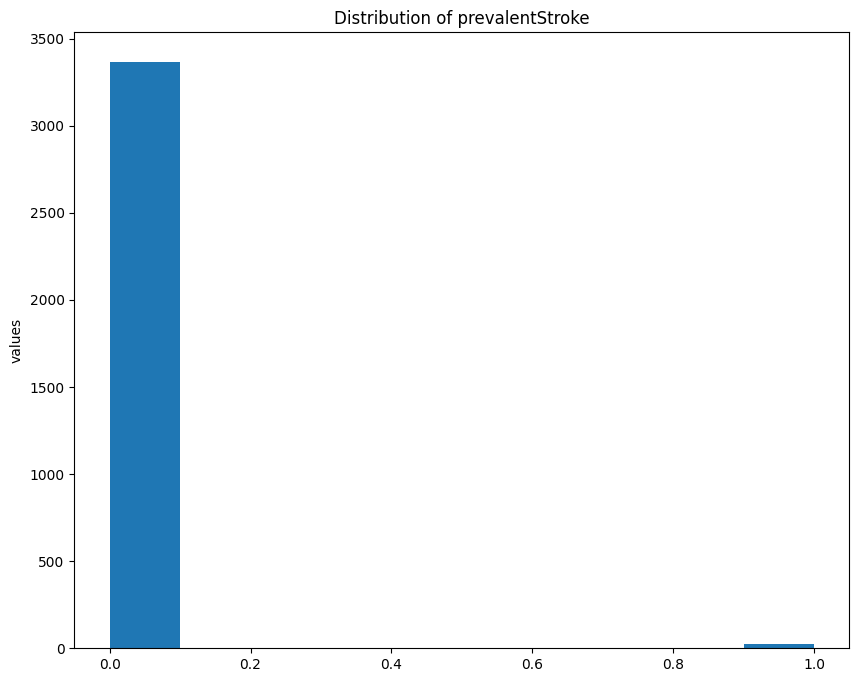

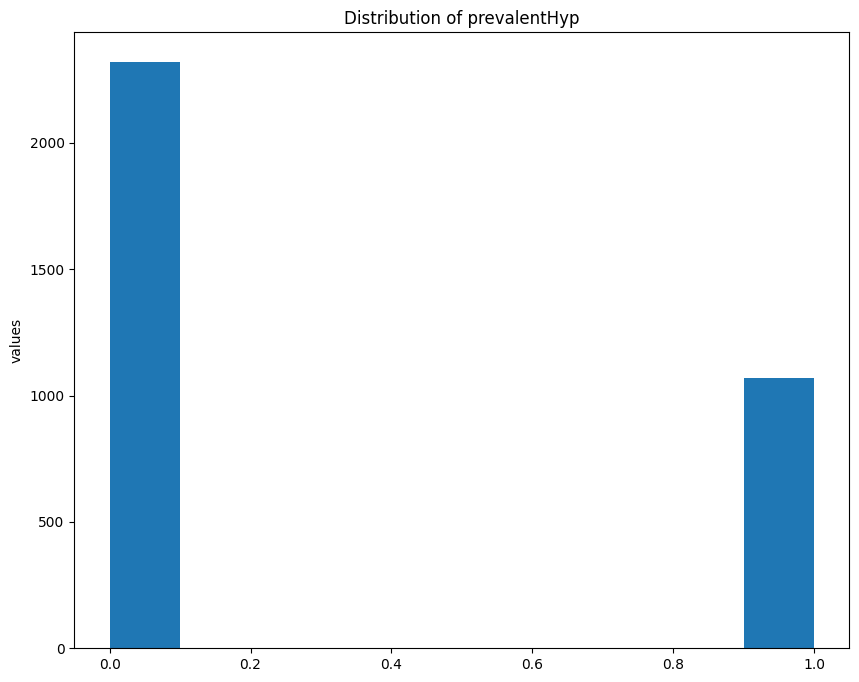

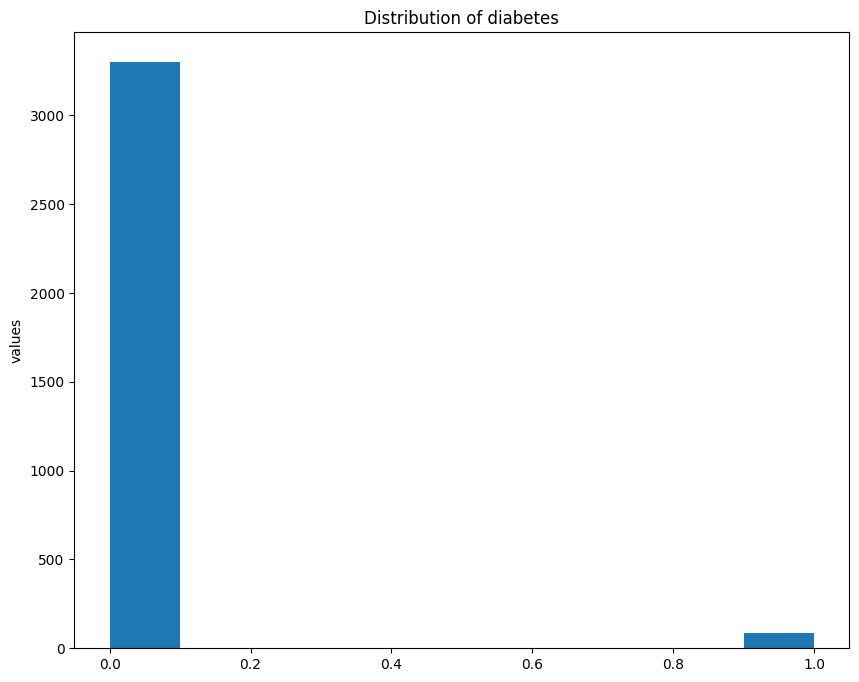

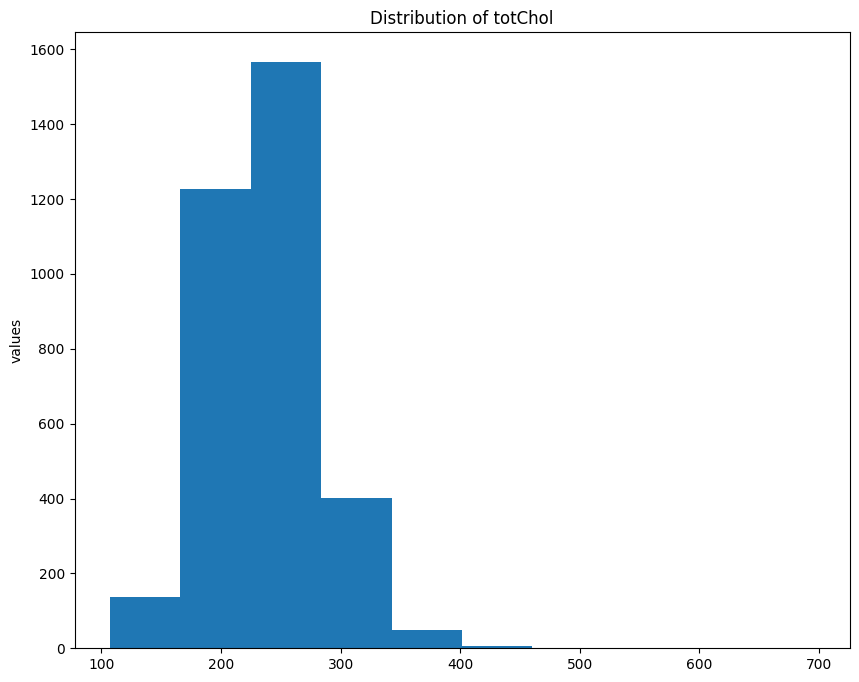

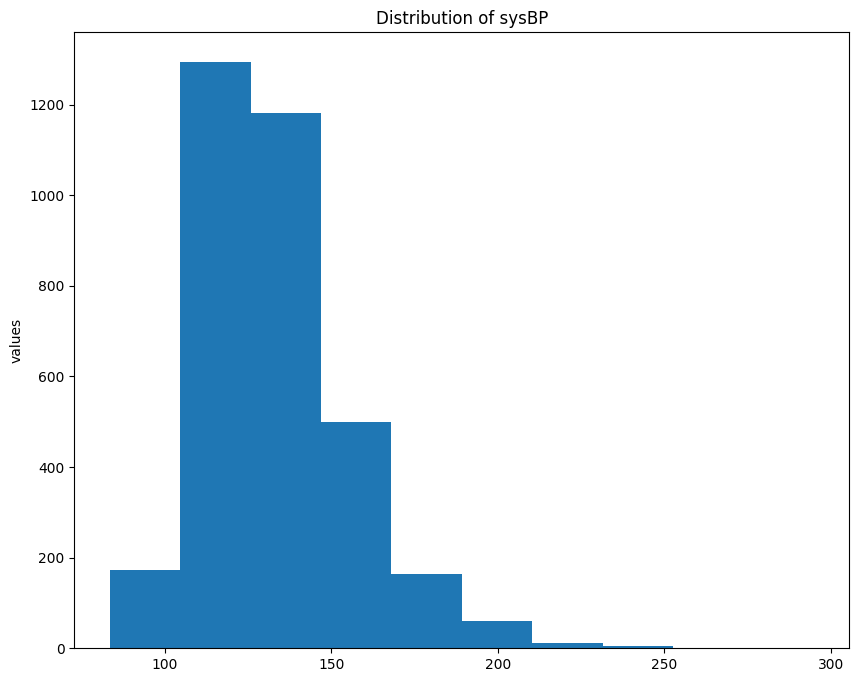

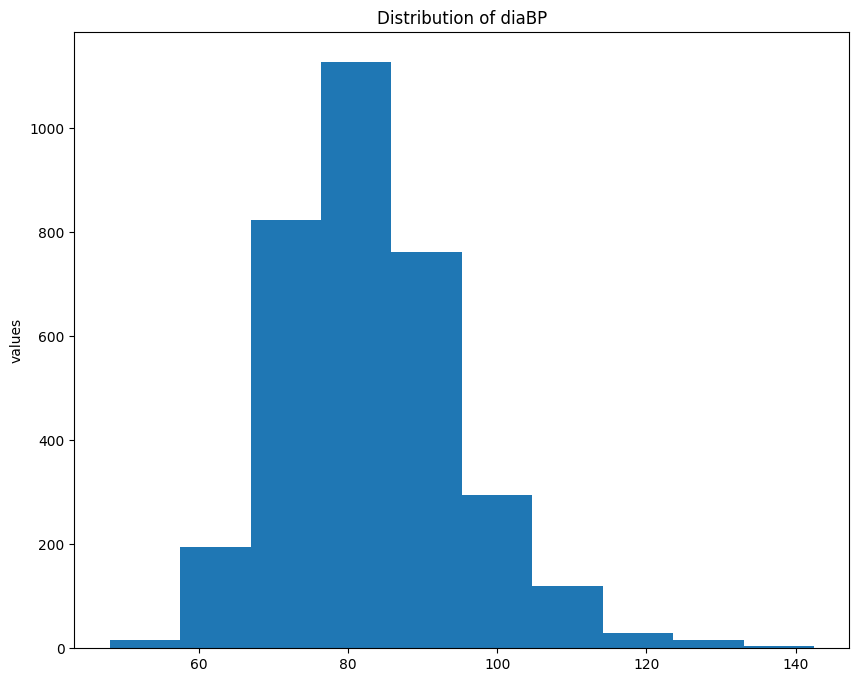

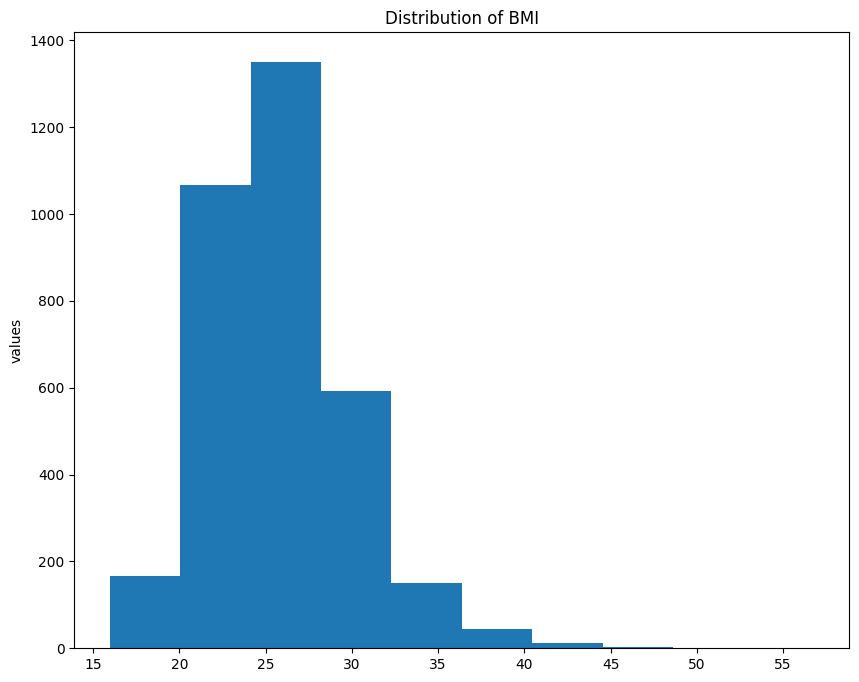

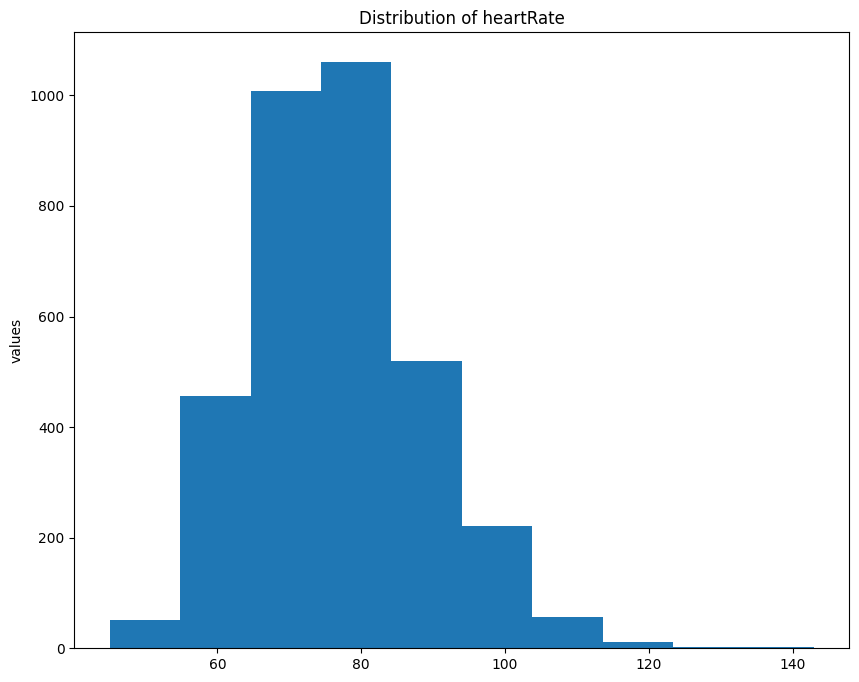

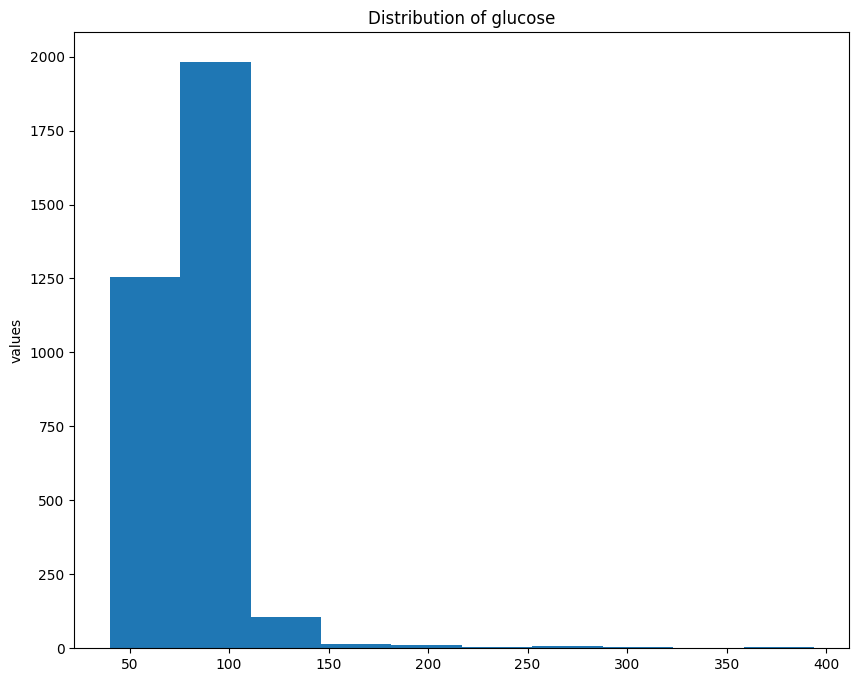

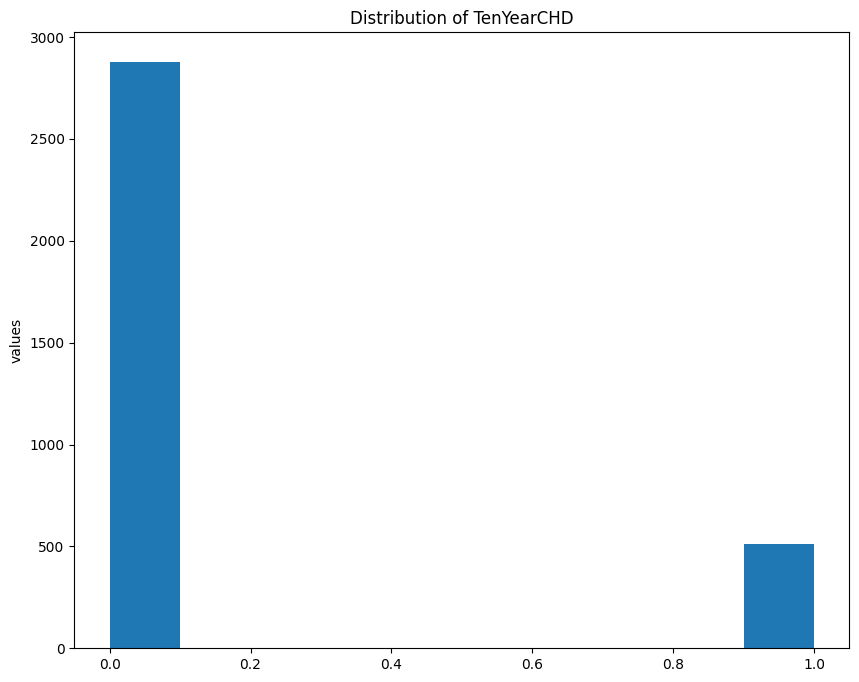

In [88]:
# Uni-varinate analysis through histogram.

for col in no_outliers_df.columns:
  plt.figure(figsize = (10,8))
  plt.hist(cardio_df[col])
  plt.gca()
  plt.title('Distribution of {}'.format(col))
  plt.ylabel('values')


# **Bi-variate Analysis**


**Hypothesis:** Those people who smoke a lot of cigarettes they are more prone to TenYearCHD.

Text(0.5, 1.0, 'box plot of TenYearCHD & Cigsperday')

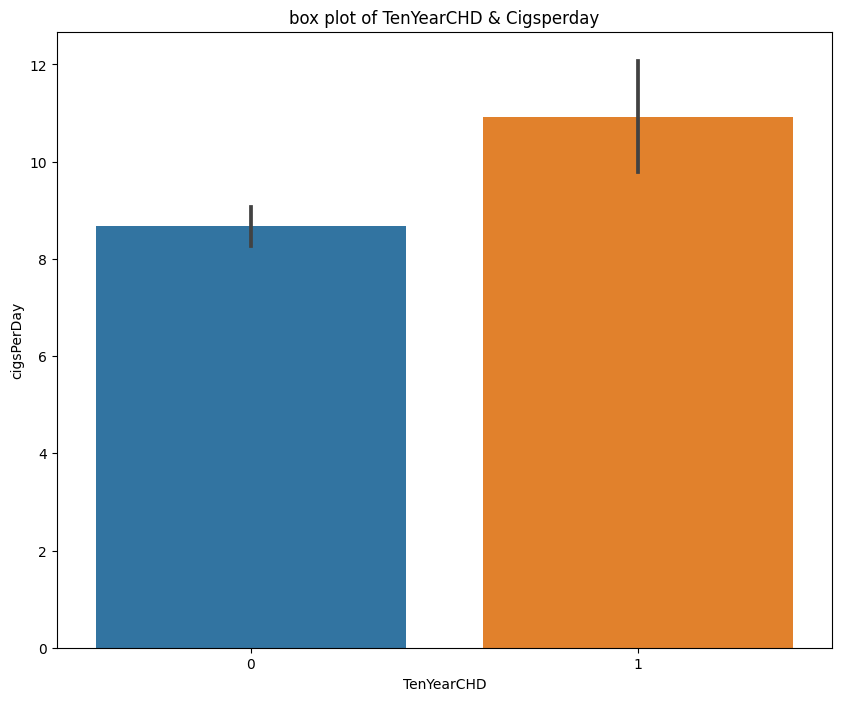

In [89]:

# Understanding the relationship between target variable and cigsperday.

plt.figure(figsize = (10,8))
sns.barplot(y = cardio_df['cigsPerDay'], x = cardio_df['TenYearCHD'])
plt.title('box plot of TenYearCHD & Cigsperday')


**Analysis :** My analysis is indeed True.



---



**Hypothesis :**  I don't think there would be any sort of relationship between sex and CHD.

Text(0.5, 1.0, 'stripplot of TenYearCHD & sex')

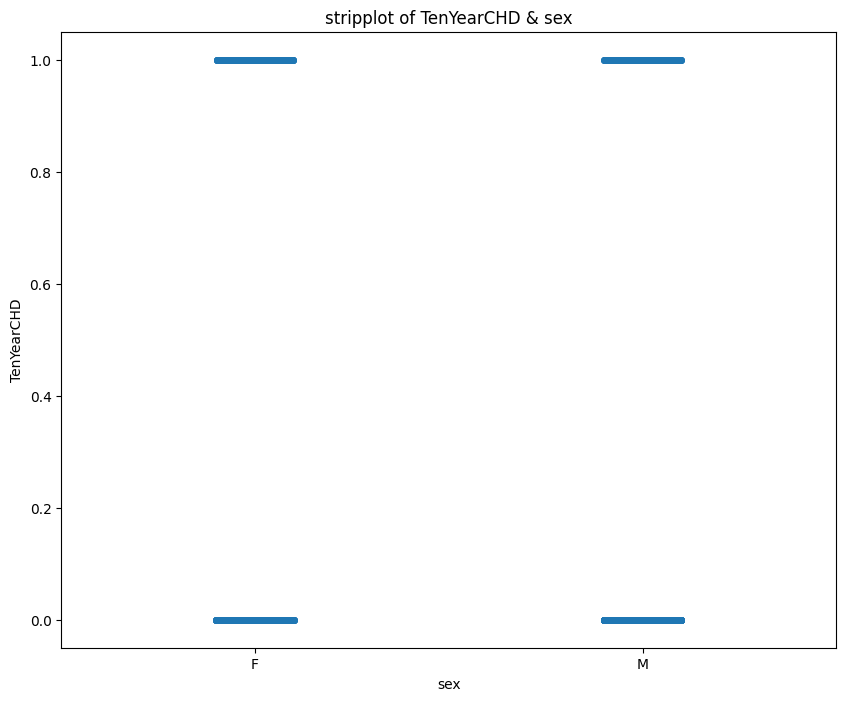

In [90]:
# Understanding the relationship between target variable and sex.

plt.figure(figsize = (10,8))
sns.stripplot(x = cardio_df['sex'], y = cardio_df['TenYearCHD'])
plt.title('stripplot of TenYearCHD & sex')

**Analysis:**  My hypothesis is correct, I don't find any relationship between sex and CHD. A male or a female can be suffering from CHD.



---





**Hypothesis:**  The ideal BMI is between 18.5 and 24.9. So any person above 24.9 is more prone to CHD.

Text(0.5, 1.0, 'lineplot of TenYearCHD & BMI')

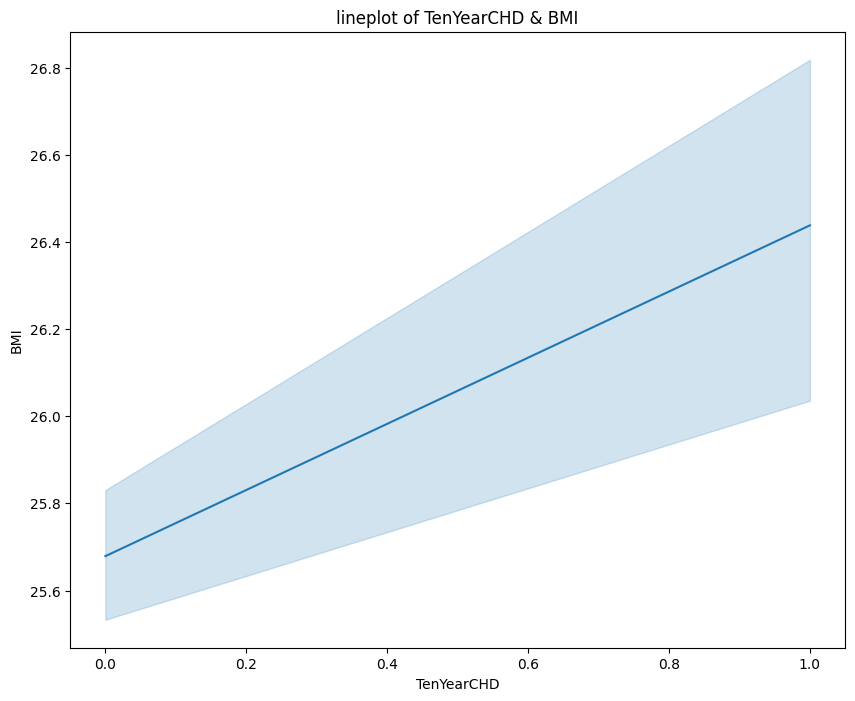

In [91]:
# Understanding the relationship between target variable and BMI.

plt.figure(figsize = (10,8))
sns.lineplot(x = cardio_df['TenYearCHD'], y = cardio_df['BMI'])
plt.title('lineplot of TenYearCHD & BMI')

**Analysis:**   As you can see there is the positive relationship between CHD and BMI. The higher the BMI, more prone to CHD and vice-versa.



---



**Hypothesis:** I think those how have high glucose may suffer from CHD.

Text(0.5, 1.0, 'boxplot of TenYearCHD & glucose')

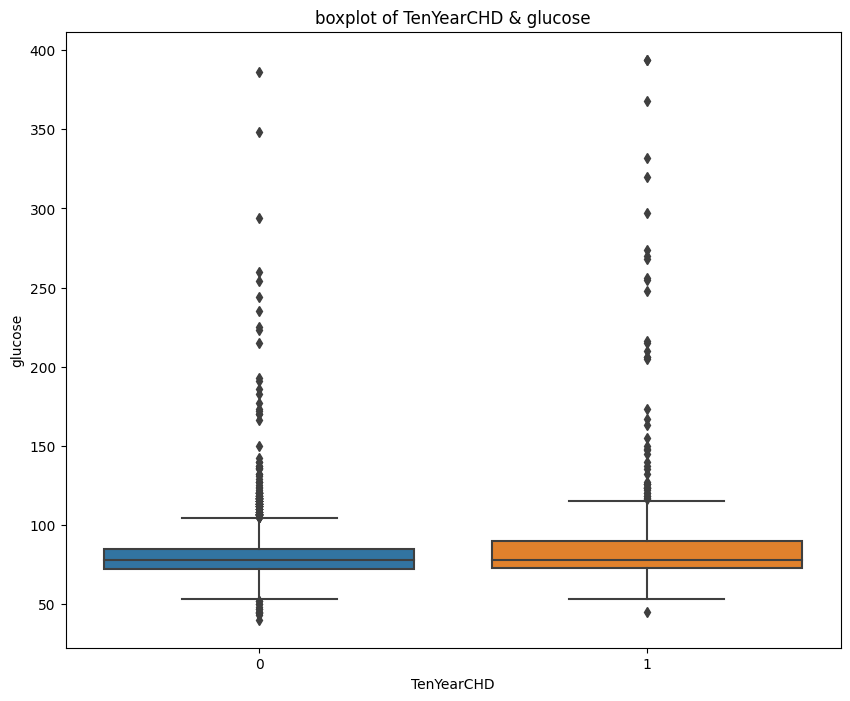

In [92]:
# Understanding the relationship between target variable and glucose.

plt.figure(figsize = (10,8))
sns.boxplot(x = cardio_df['TenYearCHD'], y = cardio_df['glucose'], data = cardio_df)
plt.title('boxplot of TenYearCHD & glucose')

**Analysis:** The relationship is not that explicit. But we can see that the median glucose level of CHD patients is higher than those of no CHD patients



---



# **Model 1: Logistic Regression**

**Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category.**




**Logistic regression is an excellent tool to know for classification problems, which are problems where the output value that we wish to predict only takes on only a small number of discrete values. Here we'll focus on the binary classification problem, where the output can take on only two distinct classes.**




# **Encoding categorical variables**

In [93]:
# Encoding the categorical variables.

no_outliers_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**objective:** The objective is to encode the categorical variables so that the model can read the data in.

Categorical Variable are classified Into three types-



*   Dichotomous variables = These are those categorical variables which have only **2 classes** of categories. We can perfom binary encoding for these kind of variables
*   Ordinal Variables = These are those categorical variables which have **more than 2 classe**s of categories and they signify **some order**. We can perform label encoding.

*   Nominal Variables = These are those categorical variables which have **more than 2 classes** of categories and they do not signify**any order**. We can perform One hot encoding.


From the above dataframe we can see that only is_smoking column and sex column has to be encoded. I will be performing a binary encoding on these columns.





In [94]:
# Binary encoding.

binary_encoding = {'sex':{'M':1, 'F':0}, 'is_smoking':{'YES':1,'NO':0}}
no_outliers_df = no_outliers_df.replace(binary_encoding)


In [95]:
no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2922 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2922 non-null   int64  
 1   education        2922 non-null   float64
 2   sex              2922 non-null   int64  
 3   is_smoking       2922 non-null   int64  
 4   cigsPerDay       2922 non-null   float64
 5   BPMeds           2922 non-null   float64
 6   prevalentStroke  2922 non-null   int64  
 7   prevalentHyp     2922 non-null   int64  
 8   diabetes         2922 non-null   int64  
 9   totChol          2922 non-null   float64
 10  sysBP            2922 non-null   float64
 11  diaBP            2922 non-null   float64
 12  BMI              2922 non-null   float64
 13  heartRate        2922 non-null   float64
 14  glucose          2922 non-null   float64
 15  TenYearCHD       2922 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 388.1 KB


# **Multicollinearity**

<Axes: >

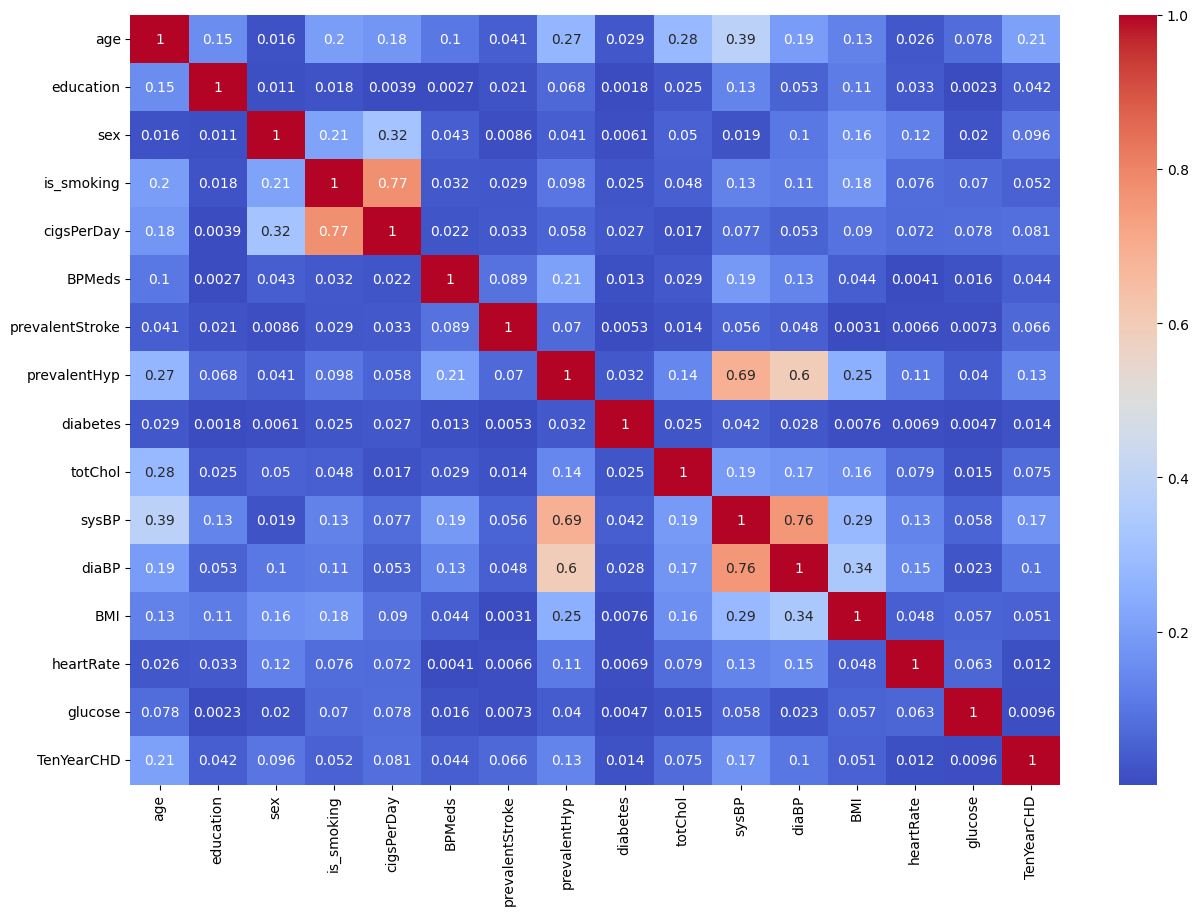

In [96]:
# Checking the correlation between variables.

corr = no_outliers_df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(abs(corr), cmap = 'coolwarm', annot= True)

From the correlation we can see that no one variable is strongly correlated with the dependent variable.

In [97]:
# Defining a function to calculate Variance Inflation factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

**Objective** - Our objective hear is to make sure that the VIF of all the columns above is below 5. If the VIF of all the columns are below 5, then we can safely assume that there is no multicollinearity between the independent variables.

**Approach** used to reduce the VIF- We will check what other variable has a VIF value of the same range.

We will check both the variables corrrelation to confrim our finding that they indeed are correlated and remove the feature that has the lowest correlation with dependent variable**(TenYearCHD)**

In [98]:
# Calculating the VIF score for the independent variables.

independent_variables = [i for i in no_outliers_df.columns if i not in ['TenYearCHD']]
calc_vif(no_outliers_df[independent_variables])


,variables,VIF
0,sysBP,168.329225
1,diaBP,153.032735
2,BMI,59.499234
3,glucose,53.056226
4,heartRate,47.753542
5,age,43.938607
6,totChol,37.874808
7,is_smoking,5.148153
8,education,4.734795
9,cigsPerDay,4.366988


In [99]:
# Removing the variables to reduce the VIF values.

independent_variables = [i for i in no_outliers_df.columns if i not in ['TenYearCHD','sysBP','diaBP','glucose',
                                                            'BMI','totChol','heartRate','is_smoking']]
calc_vif(no_outliers_df[independent_variables])

,variables,VIF
0,age,5.275794
1,education,4.034014
2,sex,2.011139
3,cigsPerDay,1.756689
4,prevalentHyp,1.521079
5,BPMeds,1.092781
6,prevalentStroke,1.018130
7,diabetes,1.007193


After following the above specified approach, we can see that all the variables VIF values are below 5 or close to 5. So we can conclude that there is no multicollinearty among the independent variables.

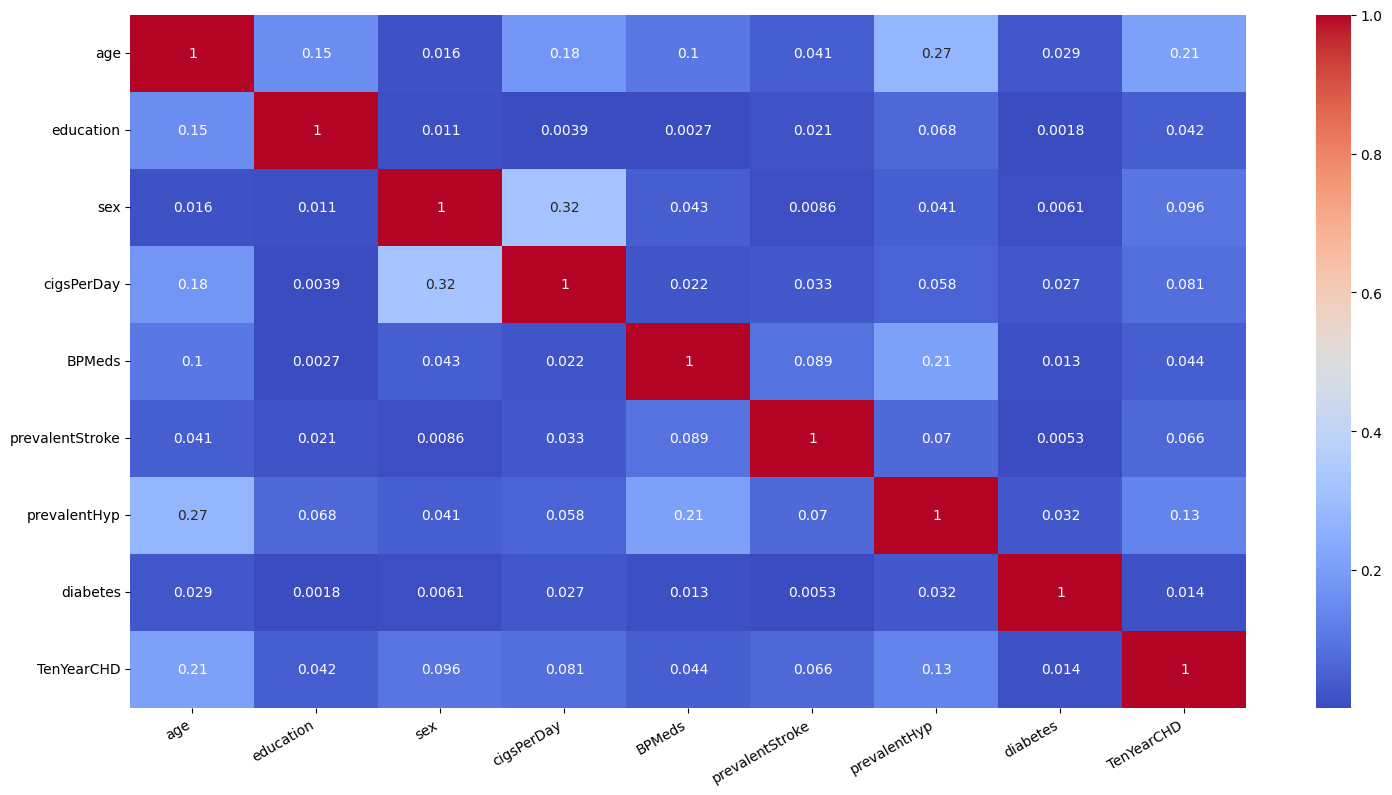

In [100]:
# Updating the dataset
no_outliers_df = no_outliers_df[independent_variables + ['TenYearCHD']]

#checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(no_outliers_df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

# **Dealing with Imbalanced Dataset.**
*Meaning of an Imbalanced dataset:* When the classes of the dependent variable are not equally distributed then we say that the dataset is imbalanced.

*Why is Imbalance dataset bad?*

Imbalance Dataset is not good because the model might predict skewed results towards the majority class.

*Approach that I will be using to solve this problem*: Since the number of observations is small I can't choose undersampling techniques. From oversamppling techniques I have decided to go for SMOTE(Synthetic Minority Oversampling Techinque).

What is *SMOTE?*

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:


*   Choose a minority class as the input vector

*   Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
*   Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor


*   Repeat the steps until data is balanced



In [101]:
# The dataset is an imbalanced.

majority_class = no_outliers_df['TenYearCHD'].value_counts()[0]
minority_class = no_outliers_df['TenYearCHD'].value_counts()[1]

print(f'The majority class has {majority_class} & the minority class has {minority_class} observations')

The majority class has 2532 & the minority class has 390 observations


In [102]:
 #Importing and Implementing SMOTE.

smote = SMOTE(random_state = 0, k_neighbors = 5)
x_smote,y_smote = smote.fit_resample(no_outliers_df.iloc[:,:-1], no_outliers_df['TenYearCHD'])

In [103]:
# Checking the number of rows in the dataset.

rows = x_smote.shape[0]
print(f'The number of rows after SMOTE are {rows}')

The number of rows after SMOTE are 5064


In [104]:
# Splitting the data into train and test samples.

X_train,X_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size = .20, random_state = 1, stratify=y_smote)

In [105]:
# Scaling the variables.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [106]:
# Checking the number of observations in the splitted data.

X_train_rows = X_train.shape[0]
X_test_rows = X_test.shape[0]
y_train_rows = y_train.shape[0]
y_test_rows = y_test.shape[0]

print(f'The number of observations in X_train:{X_train_rows}')
print(f'The number of observations in X_test:{X_test_rows}')
print(f'The number of observations in y_train:{y_train_rows}')
print(f'The number of observations in y_train:{y_test_rows}')

The number of observations in X_train:4051
The number of observations in X_test:1013
The number of observations in y_train:4051
The number of observations in y_train:1013


My reason behind stratifying: To make sure that equal number of samples from both the classes gets picked up in train and test samples.

# **Scaling the variables**

In [107]:
# Scaling the variables.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Implementing Logistic Regression**

In [108]:

# Fitting a logistic Regression model to the data.

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

  In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [109]:
# Checking out the coef_ of the model.

lr_coef = lr.coef_
lr_intercept = lr.intercept_
print(f'The coef of the model are {lr_coef} & the intercept is {lr_intercept}')

The coef of the model are [[ 0.73944541 -0.07253722 -0.10301584  0.4526829   0.05552034  0.04331244
  -0.12469031 -0.14839039]] & the intercept is [-0.00122326]


From the coef of the variables we can say that age has a lot of positive influence on model because of the high coef score.

In [110]:
# Fitting the model to the data.

y_train_lr_predict = lr.predict(X_train)
y_test_lr_predict = lr.predict(X_test)
y_train_lr_predict_proba = lr.predict_proba(X_train)[:,1]
y_test_lr_predict_proba = lr.predict_proba(X_test)[:,1]


# **Classification Metrics**
1.Confusion matrix: It is a table showing us the TN, TP, FP, FN.

True positive(TP).: This shows that a model correctly predicted Positive cases as Positive.

False positive(FP): This shows that a model incorrectly predicted Negative cases as Positive.

False Negative:(FN) This shows that an incorrectly model predicted Positive cases as Negative.

True Negative(TN): This shows that a model correctly predicted Negative cases as Positive.

Accuracy: Accuracy of a model can be calculated as the following:
Accuracy = (TN + TP) / (TN + TP + FP + FN)

roc_auc_curve: It is the area under roc_curve. The larger the value the better the model.

Classificaton report: This report shows us the percision, recall and F1-scores of the model. The higher the scores the better the model.

In [111]:
# Checking out the performance of the model.

lr_train_score_acc = accuracy_score(y_train_lr_predict,y_train)
lr_test_score_acc =  accuracy_score(y_test_lr_predict,y_test)

lr_train_roc_auc_score = roc_auc_score(y_train,y_train_lr_predict_proba)
lr_test_roc_auc_score = roc_auc_score(y_test,y_test_lr_predict_proba)

print(f'The training accuracy of the model is {lr_train_score_acc} & the testing accuracy is {lr_test_score_acc}')
print('\n')
print(f'The training roc_auc_score of the is {lr_train_roc_auc_score} & the testing score is {lr_test_roc_auc_score}')

The training accuracy of the model is 0.6519377931374969 & the testing accuracy is 0.6406712734452122


The training roc_auc_score of the is 0.7042620013893459 & the testing score is 0.6877158515954502


The training accuracy of the model is 0.6519377931374969 & the testing accuracy is 0.6406712734452122


The training roc_auc_score of the is 0.7042620013893459 & the testing score is 0.6877158515954502

**Accuracy:** The training and testing accuracies are close. From this we can conclude that the model is not overfitting.

**Note:** I will be using accuracy as a metric to compare performance of various models because it is not prone to accuracy paradox as I have solved the data imbalance issue.

**Roc_auc_score**: The higher the roc_auc_score the better the model.

[[1316  710]
 [ 700 1325]]


[Text(0, 0.5, 'NO CHD'), Text(0, 1.5, 'CHD')]

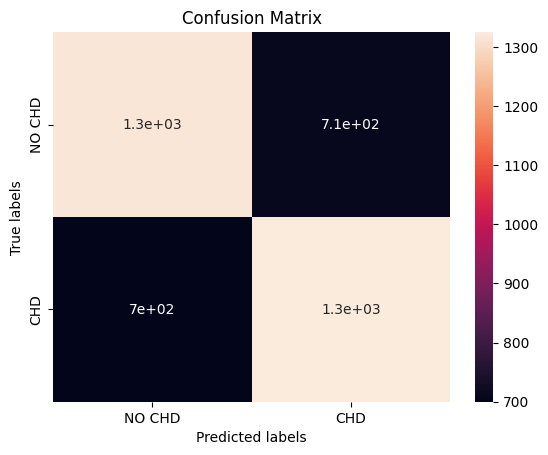

In [112]:
# Confusion_matrix of training data.

labels = ['NO CHD', 'CHD']
cm = confusion_matrix(y_train, y_train_lr_predict)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


From the above confusion matrix, we got to know the following information:

TN[actual:0, predicted:0] = 1316 observations FP[actual:0, predicted:1] = 710 observations FN[actual:1, predicted:0] = 700 observations TP[actual:1, predicted:1] = 1325 observations

[[323 183]
 [181 326]]


[Text(0, 0.5, 'NO CHD'), Text(0, 1.5, 'CHD')]

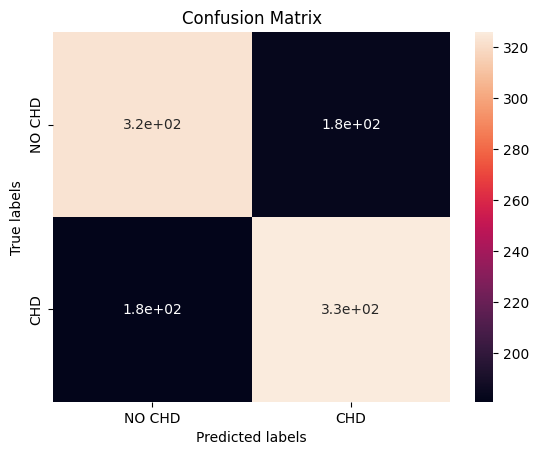

In [113]:
# Confusion_matrix of testing data.

labels = ['NO CHD', 'CHD']
cm = confusion_matrix(y_test, y_test_lr_predict)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

From the above confusion matrix, we got to know the following information:

TN[actual:0, predicted:0] = 323 observations FP[actual:0, predicted:1] = 183 observations FN[actual:1, predicted:0] = 181 observations TP[actual:1, predicted:1] = 326 observations

The percentage of misclassifications[FP + FN] are the same in training(.35) and testing data(.35).

Misclassification percentage = [FP + FN] / [TN + TP + FP + FN].

In [114]:
# Classification Report of training dataset.

print(classification_report(y_train,y_train_lr_predict))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      2026
           1       0.65      0.65      0.65      2025

    accuracy                           0.65      4051
   macro avg       0.65      0.65      0.65      4051
weighted avg       0.65      0.65      0.65      4051



In [115]:
# Classification Report of testing dataset.

print(classification_report(y_test,y_test_lr_predict))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       506
           1       0.64      0.64      0.64       507

    accuracy                           0.64      1013
   macro avg       0.64      0.64      0.64      1013
weighted avg       0.64      0.64      0.64      1013



**Precision:** It calculates the ratio of how well your model classified True positives from all the observations that were classified as 1.

Percison = TP / [TP + FP]

**Interpretation of precision** : The precision for both the training data and testing data is not high. This means that out of all actual CHD patients our model predicts only a handful of them as CHD patients.

Recall: It calculates the ratio of how well your model classified True positives from all the observations whose true value or actual value is 1.

Recall = TP / [FN + TP]

**Interpretation of Recall:** The recall for both training and testing data is not high too. This means that out of all the predicted CHD patients only a handful of them are actual CHD patients.

**f1-score:** It is the harmonic mean of precision and recall.

f1-score = 2 * ((percesion * recall) / (percesion + recall))

**Interpretation of f1-score**: The higher the f1 score, the better the model performance. In this case for both training and testing data the f1 score is not high enough.

**On what metric should we focus on?**

When our dataset is balanced, accuracy is the metric we can focus on.

but when our dataset is imbalanced, We need to focus on percision or recall(depending on the contexts).

In this context, reducing the FN(actual:1,predicted:0) is important. Hence, we need to optimize our model towards recall((TP/FN + TP). If the model predicts those who have CHD as not have CHD then that person might be in danger.

When we don't know the context, We need to focus on F-1 score.

# **Cross Validation on Logistic Regression**

In [138]:
# Implementing cross validation.

logistic_cv = LogisticRegression()
scores_lr = cross_validate(logistic_cv,X_train, y_train, scoring = 'accuracy', cv = 5, return_train_score=True,return_estimator=True,verbose = 10)


[CV] START .....................................................................
[CV] END ..................., score=(train=0.656, test=0.639) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.658, test=0.625) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.643, test=0.659) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.645, test=0.669) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.649, test=0.647) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [139]:
# Calculating the average recall score.

average_lr_cv_acc = np.mean(scores_lr['test_score'])

print('The average accuracy of logistic regression is {}'.format(average_lr_cv_acc))

The average accuracy of logistic regression is 0.647743526510481


# **Hyperparameter Tuning on Logistic Regression**

In [142]:
# Implementing Hyperparameter tuning using GridSearchCV.

lr_model_hypertuning = LogisticRegression()
solvers = ['lbfgs']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=10)
grid_search_lr = GridSearchCV(estimator=lr_model_hypertuning, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_lr = grid_search_lr.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result_lr.best_score_, grid_result_lr.best_params_))
means = grid_result_lr.cv_results_['mean_test_score']
stds = grid_result_lr.cv_results_['std_test_score']
params = grid_result_lr.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.648733 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.648486 (0.022053) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.648486 (0.022053) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.648733 (0.022020) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.648733 (0.020589) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}
0.645769 (0.021173) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}


In [146]:

# Using the parameters of the best model to predict X_test values.

lr_gird_test_predict = grid_search_lr.predict(X_test)

# Calculating the recall score.

lr_gird_test_predict = accuracy_score(y_test,lr_gird_test_predict)
print(f'The accuracy of the grid searched logistic regression model is {lr_gird_test_predict}')

The accuracy of the grid searched logistic regression model is 0.6406712734452122


# **Model 2: K-nearest neighbours.**

**K-nearest neighbors (kNN) is a supervised machine learning algorithm that can be used to solve both classification and regression tasks. kNN as an algorithm seems to be inspired from real life. People tend to be effected by the people around them. Our behaviour is guided by the friends we grew up with. Our parents also shape our personality in some ways. If you grow up with people who love sports, it is higly likely that you will end up loving sports. There are ofcourse exceptions. kNN works in a similar fashion.**

# **How does kNN work?**
The kNN working can be explained on the basis of the below algorithm:

**Step-1:** Select the number K of the neighbors.


**Step-2:** Calculate the Euclidean distance of K number of neighbors

**Step-3:** Take the K nearest neighbors as per the calculated Euclidean
distance.

**Step-4:** Among these k neighbors, count the number of the data points in each
category.

**Step-5:** Assign the new data points to that category for which the number of the neighbor is maximum.

**Step-6:** Our model is ready.

**Characteristics of kNN**


*  K-Nearest Neighbors is one of the simplest supervised learning algorithms.
*  kNN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.


*   kNN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
*  kNN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

*   kNN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
*   KNN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.


*   kNN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.


* kNN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using kNN algorithm.  

*   kNN algorithm can be used for regression as well as for classification problems.
kNN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

*  It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

*  It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

* kNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.  







# **Encoding Categorical Variables**

In [116]:
# Encoding the categorical variables.

binary_encoding = {'sex':{'M':1, 'F':0}, 'is_smoking':{'YES':1,'NO':0}}
cardio_df = cardio_df.replace(binary_encoding)

# **Solving Imbalanced dataset**

In [117]:
# The dataset is an imbalanced.

majority_class_knn = cardio_df['TenYearCHD'].value_counts()[0]
minority_class_knn = cardio_df['TenYearCHD'].value_counts()[1]

print(f'The majority class has {majority_class_knn} & the minority class has {minority_class_knn} observations')

The majority class has 2879 & the minority class has 511 observations


In [118]:
# Implementing SMOTE to make the dataset a balanced one.

smote = SMOTE(random_state = 5, k_neighbors = 5)
x_smote_knn,y_smote_knn = smote.fit_resample(cardio_df.iloc[:,:-1], cardio_df['TenYearCHD'])

In [119]:
# Checking the number of rows in the dataset.

knn_rows = x_smote_knn.shape[0]
print(f'The number of rows after SMOTE are {knn_rows}')


The number of rows after SMOTE are 5758


In [120]:

# Splitting the data into train and test samples.

X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(x_smote_knn, y_smote_knn, test_size = .20, random_state = 1, stratify=y_smote_knn)


In [121]:
# Checking the number of observations in the splitted data.

X_train_knn_rows = X_train_knn.shape[0]
X_test_knn_rows = X_test_knn.shape[0]
y_train_knn_rows = y_train_knn.shape[0]
y_test_knn_rows = y_test_knn.shape[0]

print(f'The number of observations in X_train:{X_train_rows}')
print(f'The number of observations in X_test:{X_test_rows}')
print(f'The number of observations in y_train:{y_train_rows}')
print(f'The number of observations in y_train:{y_test_rows}')


The number of observations in X_train:4051
The number of observations in X_test:1013
The number of observations in y_train:4051
The number of observations in y_train:1013


# **Scaling & Implementing K-nearest Neighbors**

In [122]:
# Scaling the variables.

scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)


Scaling the variables is important while implementing KNN because KNN is baised towards variables that have a large range of values.

In [123]:
# Implementing KNN.

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn,y_train_knn)



KNeighborsClassifier()

In [124]:
# Using the fitted model for prediction.

y_train_knn_predict = knn.predict(X_train_knn)
y_test_knn_predict = knn.predict(X_test_knn)
y_train_knn_predict_proba = knn.predict_proba(X_train_knn)[:,1]
y_test_knn_predict_proba = knn.predict_proba(X_test_knn)[:,1]


# **Classification Metrics**

In [125]:
# Checking out the performance of the model.

knn_train_score_acc = accuracy_score(y_train_knn,y_train_knn_predict)
knn_test_score_acc =  accuracy_score(y_test_knn,y_test_knn_predict)

knn_train_roc_auc_score = roc_auc_score(y_train_knn,y_train_knn_predict_proba)
knn_test_roc_auc_score = roc_auc_score(y_test_knn,y_test_knn_predict_proba)

print(f'The training accuracy of the model is {knn_train_score_acc} & the testing accuracy is {knn_test_score_acc}')
print('\n')
print(f'The training roc_auc_score of the is {knn_train_roc_auc_score} & the testing score is {knn_test_roc_auc_score}')

The training accuracy of the model is 0.8519322622666088 & the testing accuracy is 0.7847222222222222


The training roc_auc_score of the is 0.9505224452841344 & the testing score is 0.8670563874421295


[[1735  568]
 [ 114 2189]]


[Text(0, 0.5, 'NO CHD'), Text(0, 1.5, 'CHD')]

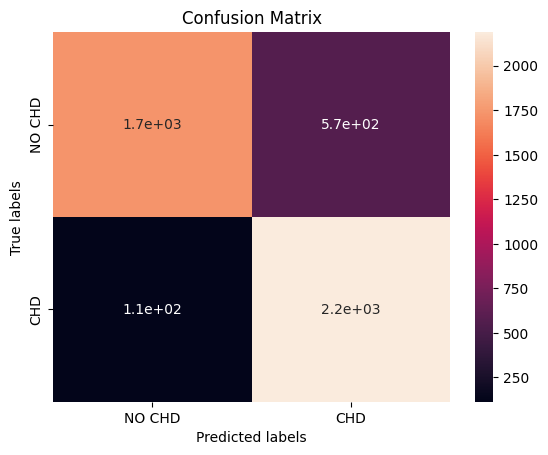

In [126]:
# Confusion_matrix of training data.

labels = ['NO CHD', 'CHD']
cm = confusion_matrix(y_train_knn, y_train_knn_predict)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


From the above confusion matrix, we got to know the following information:

TN[actual:0, predicted:0] = 1735 observations FP[actual:0, predicted:1] = 568 observations FN[actual:1, predicted:0] = 114 observations TP[actual:1, predicted:1] = 2189 observations

[[380 196]
 [ 52 524]]


[Text(0, 0.5, 'NO CHD'), Text(0, 1.5, 'CHD')]

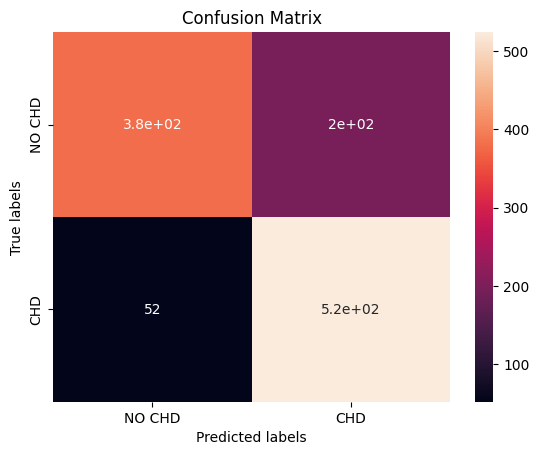

In [127]:
# Confusion_matrix of testing data.

labels = ['NO CHD', 'CHD']
cm = confusion_matrix(y_test_knn, y_test_knn_predict)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


From the above confusion matrix, we got to know the following information:

TN[actual:0, predicted:0] = 380 observations FP[actual:0, predicted:1] = 196 observations FN[actual:1, predicted:0] = 52 observations TP[actual:1, predicted:1] = 524 observations

The percentage of misclassifications[FP + FN] have increased from .14 in training data to .21 in the test data

Misclassification percentage = [FP + FN] / [TN + TP + FP + FN].

In [128]:
# Classification Report of training dataset.

print(classification_report(y_train_knn,y_train_knn_predict))


              precision    recall  f1-score   support

           0       0.94      0.75      0.84      2303
           1       0.79      0.95      0.87      2303

    accuracy                           0.85      4606
   macro avg       0.87      0.85      0.85      4606
weighted avg       0.87      0.85      0.85      4606



In [129]:
# Classification Report of testing dataset.

print(classification_report(y_test_knn,y_test_knn_predict))


              precision    recall  f1-score   support

           0       0.88      0.66      0.75       576
           1       0.73      0.91      0.81       576

    accuracy                           0.78      1152
   macro avg       0.80      0.78      0.78      1152
weighted avg       0.80      0.78      0.78      1152



# **Cross Validation on KNN**

In [135]:
# Implementing cross validation.

knn_cv = KNeighborsClassifier()
scores_knn = cross_validate(knn_cv,X_train_knn, y_train_knn, scoring = 'accuracy', cv = 5, return_train_score=True,return_estimator=True,verbose = 10)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ..................., score=(train=0.832, test=0.778) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] END ..................., score=(train=0.837, test=0.759) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] END ..................., score=(train=0.850, test=0.736) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV] END ..................., score=(train=0.847, test=0.719) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s


[CV] END ..................., score=(train=0.835, test=0.756) total time=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


In [136]:
# Calculating the average accuracy score.

average_knn_cv_acc = np.mean(scores_knn['test_score'])

print('The average accuracy of knn is {}'.format(average_knn_cv_acc))

The average accuracy of knn is 0.7494511059138302


# **Hyperparameter Tuning on KNN**

In [143]:
# Hyperparameter Tuning.

param_grid = {'n_neighbors':np.arange(1,50)}
knn_tuning = KNeighborsClassifier()
knn_grid= GridSearchCV(knn_tuning,param_grid,cv=5)
knn_grid.fit(X_train_knn,y_train_knn)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [148]:
# Making predictions test using the best found parameter.

grid_knn_y_test_predict = knn_grid.predict(X_test_knn)

# Calculating the recall score.

knn_grid_test_predict = accuracy_score(y_test_knn,grid_knn_y_test_predict)
print(f'The accuracy of the grid search knn model is {knn_grid_test_predict}')

The accuracy of the grid search knn model is 0.8211805555555556


# **Model Comparison**

**Comparing the performance of variables models**

Text(0.5, 1.0, 'Arbitrary accuracy of the models')

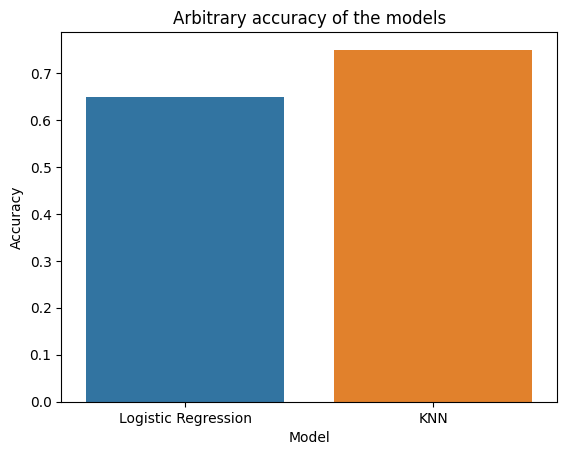

In [140]:

# Creating a dataframe and plotting a barchart to compare the performance of the models.

arbitrary_models_performance = pd.DataFrame({'Model':['Logistic Regression','KNN'],'Accuracy':[average_lr_cv_acc,average_knn_cv_acc]})

sns.barplot(x = arbitrary_models_performance['Model'], y = arbitrary_models_performance['Accuracy'])
plt.title('Arbitrary accuracy of the models')


Text(0.5, 1.0, 'Optimal accuracy of the models')

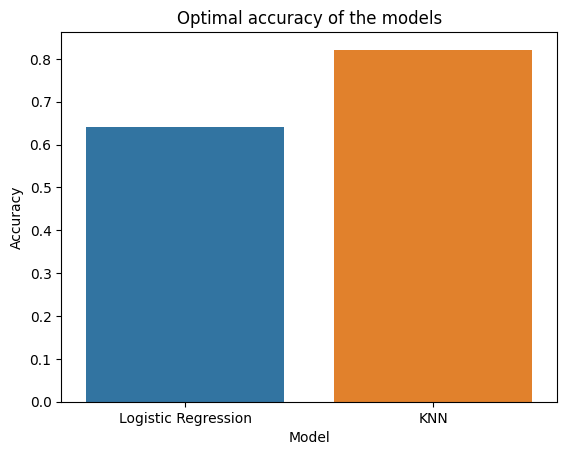

In [149]:

# Creating a dataframe and plotting a barchart to compare the optimal performance of the models.

hypertuned_performance = pd.DataFrame({'Model':['Logistic Regression','KNN'], 'Accuracy':[lr_gird_test_predict,knn_grid_test_predict]})

sns.barplot(x = hypertuned_performance['Model'], y = hypertuned_performance['Accuracy'])
plt.title('Optimal accuracy of the models')

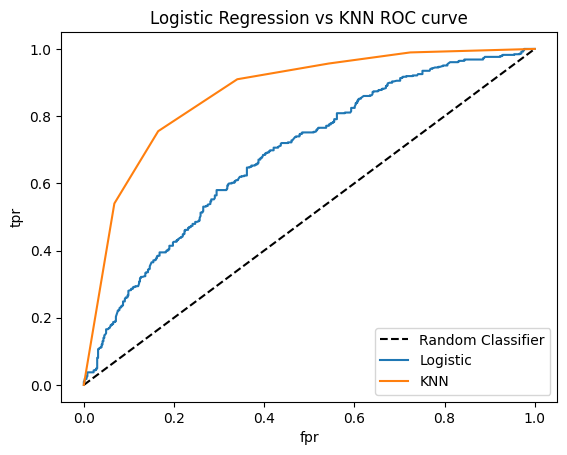

In [132]:
 #Plotting the ROC curves for various models.

fpr, tpr, thresholds = roc_curve(y_test, y_test_lr_predict_proba)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_knn,y_test_knn_predict_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.plot(fpr_knn,tpr_knn)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression vs KNN ROC curve')
plt.legend(['Random Classifier','Logistic','KNN'])
plt.show()


## **Saving the model weights**

In [150]:
# Storing the KNN(best evaluation model) in a pickle file.

pickle.dump(knn_grid,open('knn_model.pkl','wb'))



# **Conclusion**
We started the project by identifying what are continous numeric variables, discrete numeric variables, and also categorical variables. Then, we did some data preprocessing steps like duplicate value removal, null value removal. Then, we moved onto EDA, transformed the dependent variable, worked on the continous variables, transformed discrete numeric variables into categorical, worked on the categorical variables, solved the imbalance dataset problem using smote and chose accuracy as the primary metric for comparing models.


We implemented 2 models: Logistic Regression and KNN also Hypertuned the models to find out the best parameters.



**My thoughts on the models:**

K-nearest neighbours(KNN): Even though the model is simple, it has done a got job at classifiying the observations. Cross validated score of the model was around 0.75 and after tuning the k parameter the model's accuracy has increased to .82

Logistic Regression: Relatively it has not done a good job at classifiying the observations. The cross validated accuracy score[.65], hyper-tuned[.65] accuracy was below the KNN's accuracy score. Even after tuning the hyperparameters the model accuracy was not improved.

Used Eli5 to understand the Global, and local explainability for logistic regression model.